# TESI 

## 1. Pre-processing text

## 1.1 Introduction to the data:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk # for tokenization
import sklearn #for matrix frequency, stopwords,stemming
import spacy # for lemmatization

In [2]:
df = pd.read_excel("Forma tecnica.xlsx", sheet_name = 'Foglio1')

In [3]:
df

,LOAN_TYPE_DSC,clustering
0,SPECIALE AGRARIO A MEDIO LUNGO,ALTRI FINANZIAMENTI
1,NaN,ALTRI FINANZIAMENTI
2,SOFFERENZE NON RIPARTITE (CLIENTELA),ALTRI FINANZIAMENTI
3,SOVVENZIONE MICROCREDITO,ALTRI FINANZIAMENTI
4,CREDITO AGRARIO DI MIGLIORAMENTO,ALTRI FINANZIAMENTI
...,...,...
763,RAPPORTO SPESE,SPESE
764,SPESE LEGALI MEDIA 4,SPESE
765,SPESE PER FIDEJUSSIONE A FAVORE TERZI0,SPESE
766,SPESE LEGALI EXTRACONTABILI,SPESE


In [4]:
df.sample(10)

,LOAN_TYPE_DSC,clustering
38,ESBORSI NS.FIDEIUS.E ALTRI IMP,ALTRI FINANZIAMENTI
371,SOFF EX SOVV. C/C MT 03-P2-42-30501796 Pres...,CONTI CORRENTI
638,SOFF EX MUTUI 03-P5-09-10566200,CONTO MUTUO IPOTECARIO
156,FIDEIUSSIONI DI NATURA FIN.RIA ATTENUATA,ALTRI FINANZIAMENTI
733,TRATTE SEMPLICI/RICEVUTE S.B.F. A SCADERE,"FIN. PER ANTICIPI SU EFFETTI, ALTRI TITOLI DI ..."
395,SOFF EX C/C 01-C1-02-10474153 C/C Imprese,CONTI CORRENTI
528,CREDITO FONDIARIO,CONTO MUTUO IPOTECARIO
657,SOFF EX MUTUI 03-P1-03-40095585 Mutui IPOar...,CONTO MUTUO IPOTECARIO
584,SOFF EX MUTUI 03-P5-64-31000786 Mutui Ipo 3M,CONTO MUTUO IPOTECARIO
485,"ANTICIPI, SCONTI COMMERCIALI, FIN.ESTERI < 50.000",CONTO ANTICIPO FATTURE


In [5]:
df.shape

(768, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 2 columns):
LOAN_TYPE_DSC    767 non-null object
clustering       768 non-null object
dtypes: object(2)
memory usage: 12.1+ KB


In [7]:
df.dtypes

LOAN_TYPE_DSC    object
clustering       object
dtype: object

In [8]:
len(df.clustering.unique())

17

In [9]:
len(df.LOAN_TYPE_DSC.unique())

768

In [10]:
# Check for the existence of NaN values in a cell:
df.isnull().sum()

LOAN_TYPE_DSC    1
clustering       0
dtype: int64

In [11]:
df.dropna(inplace=True)

len(df)

767

In [12]:
df.isnull().sum()

LOAN_TYPE_DSC    0
clustering       0
dtype: int64

In [13]:
len(df)

767

In [14]:
# Technically, we're dealing with "whitespace only" strings. 2

blanks = []  # start with an empty list

for index,LOAN_TYPE_DSC,clustering in df.itertuples():  # iterate over the DataFrame
    if type(LOAN_TYPE_DSC)==str:            # avoid NaN values
        if LOAN_TYPE_DSC.isspace():         # test 'LOAN_TYPE_DSC' for whitespace
            blanks.append(index)     # add matching index numbers to the list
        
blanks

[]

In [15]:
blanks = []  # start with an empty list

for index,LOAN_TYPE_DSC,clustering in df.itertuples():  # iterate over the DataFrame
    if type(clustering)==str:            # avoid NaN values
        if clustering.isspace():         # test 'LOAN_TYPE_DSC' for whitespace
            blanks.append(index)     # add matching index numbers to the list
        
blanks

[]

In [16]:
#df.LOAN_TYPE_DSC=df.LOAN_TYPE_DSC.astype(str)

In [17]:
#df.clustering = df.clustering.astype(str)

In [18]:
df.clustering.value_counts()

ALTRI FINANZIAMENTI                                                    213
CONTO MUTUO IPOTECARIO                                                 183
CONTI CORRENTI                                                         183
CONTO ANTICIPO FATTURE                                                  69
C/C GARANTITO DA IPOTECA A DECURTAZIONE PERIODICA                       25
FIN. PER ANTICIPI SU EFFETTI, ALTRI TITOLI DI CRED. E DOCUMENTI SBF     22
CONTI MUTUO CHIROGRAFARI - AZIENDE                                      16
SPESE                                                                   15
PRESTITI PERSONALI                                                      14
C/C GARANTITO DA IPOTECA A SCADENZA                                     10
CONTO MUTUO CHIROGRAFARIO ARTIGIANCASS                                   5
CARTE DI CREDITO: UTILIZZO - NON REVOLVING                               4
CONTO MUTUO IPOTECARIO ARTIGIANCASSA                                     3
DERIVATI DIVERSI DA DERIV

In [19]:
df.LOAN_TYPE_DSC.value_counts()

FINANZIAMENTO NON IPOTECARIO PRESTIQUATTRO            1
Conti mutui disdettati                                1
SOFF EX C/C GAR. REALE 01-C2-03-30316905              1
PRESTITI PERSONALI BREVE TERMINE                      1
SOFF EX MUTUI  03-P5-09-10281900                      1
                                                     ..
SOFF EX SOVV. C/C MT  03-P2-42-30501796   Prestito    1
MUTUO IPOTECARIO T.F.                                 1
FINANZ. CHIROGRAFARIO L.R.51/9                        1
CREDITO CARTOLARIZZATO SIENA MORTGAGES 02-3 EX BT     1
NEGOZIAZIONE PER CASSA ASS. ALTRE BANCHE              1
Name: LOAN_TYPE_DSC, Length: 767, dtype: int64

In [20]:
cluster_per_loans = df.groupby('clustering')[['LOAN_TYPE_DSC']].count()
cluster_per_loans = cluster_per_loans.sort_values(["LOAN_TYPE_DSC"], ascending = False)
cluster_per_loans

,LOAN_TYPE_DSC
clustering,
ALTRI FINANZIAMENTI,213
CONTI CORRENTI,183
CONTO MUTUO IPOTECARIO,183
CONTO ANTICIPO FATTURE,69
C/C GARANTITO DA IPOTECA A DECURTAZIONE PERIODICA,25
"FIN. PER ANTICIPI SU EFFETTI, ALTRI TITOLI DI CRED. E DOCUMENTI SBF",22
CONTI MUTUO CHIROGRAFARI - AZIENDE,16
SPESE,15
PRESTITI PERSONALI,14


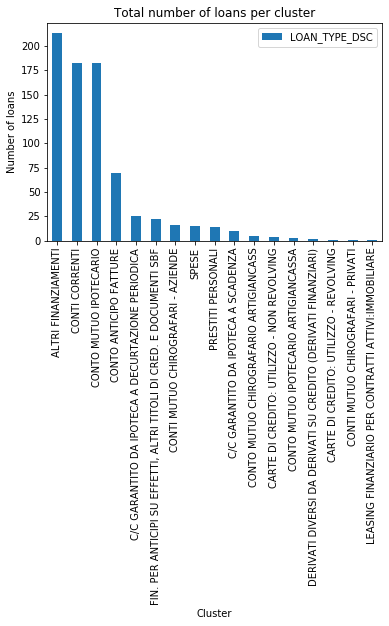

In [21]:
# visualize loan types per cluster in a bar graph:
cluster_per_loans.plot(kind='bar')
plt.xlabel('Cluster')
plt.ylabel('Number of loans')
plt.title("Total number of loans per cluster")
plt.show()

In [22]:
cluster_per_loans['LOAN_TYPE_DSC_percentage']=df.groupby('clustering')[['LOAN_TYPE_DSC']].count() / df.shape[0]
cluster_per_loans

,LOAN_TYPE_DSC,LOAN_TYPE_DSC_percentage
clustering,,
ALTRI FINANZIAMENTI,213,0.277705
CONTI CORRENTI,183,0.238592
CONTO MUTUO IPOTECARIO,183,0.238592
CONTO ANTICIPO FATTURE,69,0.089961
C/C GARANTITO DA IPOTECA A DECURTAZIONE PERIODICA,25,0.032595
"FIN. PER ANTICIPI SU EFFETTI, ALTRI TITOLI DI CRED. E DOCUMENTI SBF",22,0.028683
CONTI MUTUO CHIROGRAFARI - AZIENDE,16,0.020860
SPESE,15,0.019557
PRESTITI PERSONALI,14,0.018253


## 1.2 Tokenization:
    
Tokenization is a process of splitting the text into pieces. These pieces are called tokens. A token could be a word, a phrase or even a sentence. In many applications, tokenization refer to splitting the text into words and I’ll only demonstrate the work tokenization. There are different tokenization strategies. A simple tokenization strategy would be to consider space as a separator and discard punctuation characters from the text and we would end up with the words. In Python, we can use split function with space as separator to get a list of words from a text.

### 1.2.1 RegexpTokenizer

In [23]:
# Instantiate Tokenizer # Remove punctutation immediately
#from nltk.tokenize import RegexpTokenizer
#tokenizer = RegexpTokenizer(r'[\w\']+') 

In [24]:
#df['LOAN_TYPE_TOK'] = df['LOAN_TYPE_DSC'].apply(lambda x: tokenizer.tokenize(x.lower()))
#df['clustering_TOK'] = df['clustering'].apply(lambda x: tokenizer.tokenize(x.lower()))

In [25]:
#df.head()

In [26]:
# see if it works
#df.loc[218]

### 1.2.2. word_tokenize:

In [27]:
from nltk.tokenize import word_tokenize

In [28]:
# convert lower case:

In [29]:
df["LOAN_TYPE_DSC_lower"] = df["LOAN_TYPE_DSC"].str.lower()
df["clustering_lower"] = df["clustering"].str.lower()

In [30]:
# eliminare punteggiatura tranne in c/c:

In [31]:
punctuation = '/!"#$%&\'()*+,-.:;<=>?@[\\]^_`{|}~'

In [32]:
def remove_punctuation (text):
    text_nopunct= "".join([c for c in text if c not in punctuation])
    return text_nopunct

In [33]:
df['LOAN_TYPE_wp'] = df['LOAN_TYPE_DSC_lower'].apply(lambda x: remove_punctuation(x))
df['clustering_wp'] = df['clustering_lower'].apply(lambda x: remove_punctuation(x))

In [34]:
# eliminare anche numeri

In [35]:
numbers = '0123456789'

In [36]:
def remove_numbers (text):
    text_nonumbers= "".join([i for i in text if i not in numbers])
    return text_nonumbers

In [37]:
df['LOAN_TYPE_wn'] = df['LOAN_TYPE_wp'].apply(lambda x: remove_numbers(x))
df['clustering_wn'] = df['clustering_wp'].apply(lambda x: remove_numbers(x))

In [38]:
# tokenization:

In [39]:
df['LOAN_TYPE_TOK2'] = df['LOAN_TYPE_wn'].apply(lambda x: word_tokenize(x))
df['clustering_TOK2'] = df['clustering_wn'].apply(lambda x: word_tokenize(x))

In [40]:
df[['LOAN_TYPE_DSC','clustering','LOAN_TYPE_TOK2','clustering_TOK2']].sample(10)

,LOAN_TYPE_DSC,clustering,LOAN_TYPE_TOK2,clustering_TOK2
55,ALTRO,ALTRI FINANZIAMENTI,[altro],"[altri, finanziamenti]"
641,SOFF EX MUTUI 03-P5-75-10636728 Finanz.IPOa...,CONTO MUTUO IPOTECARIO,"[soff, ex, mutui, p, finanzipoari, r]","[conto, mutuo, ipotecario]"
264,0020/ORDINARIO,CONTI CORRENTI,[ordinario],"[conti, correnti]"
473,ANT IN VALUTA ALL'ESPORTAZIONE,CONTO ANTICIPO FATTURE,"[ant, in, valuta, allesportazione]","[conto, anticipo, fatture]"
683,SOFF EX MUTUI 03-P5-69-31000585 Mutui Ipo 6M,CONTO MUTUO IPOTECARIO,"[soff, ex, mutui, p, mutui, ipo, m]","[conto, mutuo, ipotecario]"
53,ALTRO CONTRATTO,ALTRI FINANZIAMENTI,"[altro, contratto]","[altri, finanziamenti]"
395,SOFF EX C/C 01-C1-02-10474153 C/C Imprese,CONTI CORRENTI,"[soff, ex, cc, c, cc, imprese]","[conti, correnti]"
433,SOFF EX C/C 01-C1-02-31036486 C/C Imprese,CONTI CORRENTI,"[soff, ex, cc, c, cc, imprese]","[conti, correnti]"
552,MUTUI ARTIGIANI IPOTECARI,CONTO MUTUO IPOTECARIO,"[mutui, artigiani, ipotecari]","[conto, mutuo, ipotecario]"
422,SOFF EX C/C 01-CC-42-10456028 C/Profession...,CONTI CORRENTI,"[soff, ex, cc, cc, cprofessionisti]","[conti, correnti]"


In [41]:
df[['LOAN_TYPE_DSC','clustering','LOAN_TYPE_TOK2','clustering_TOK2']].head(5)

,LOAN_TYPE_DSC,clustering,LOAN_TYPE_TOK2,clustering_TOK2
0,SPECIALE AGRARIO A MEDIO LUNGO,ALTRI FINANZIAMENTI,"[speciale, agrario, a, medio, lungo]","[altri, finanziamenti]"
2,SOFFERENZE NON RIPARTITE (CLIENTELA),ALTRI FINANZIAMENTI,"[sofferenze, non, ripartite, clientela]","[altri, finanziamenti]"
3,SOVVENZIONE MICROCREDITO,ALTRI FINANZIAMENTI,"[sovvenzione, microcredito]","[altri, finanziamenti]"
4,CREDITO AGRARIO DI MIGLIORAMENTO,ALTRI FINANZIAMENTI,"[credito, agrario, di, miglioramento]","[altri, finanziamenti]"
5,FINANZIAMENTI CHIROGRAFARI A MLT,ALTRI FINANZIAMENTI,"[finanziamenti, chirografari, a, mlt]","[altri, finanziamenti]"


In [42]:
df.head()

,LOAN_TYPE_DSC,clustering,LOAN_TYPE_DSC_lower,clustering_lower,LOAN_TYPE_wp,clustering_wp,LOAN_TYPE_wn,clustering_wn,LOAN_TYPE_TOK2,clustering_TOK2
0,SPECIALE AGRARIO A MEDIO LUNGO,ALTRI FINANZIAMENTI,speciale agrario a medio lungo,altri finanziamenti,speciale agrario a medio lungo,altri finanziamenti,speciale agrario a medio lungo,altri finanziamenti,"[speciale, agrario, a, medio, lungo]","[altri, finanziamenti]"
2,SOFFERENZE NON RIPARTITE (CLIENTELA),ALTRI FINANZIAMENTI,sofferenze non ripartite (clientela),altri finanziamenti,sofferenze non ripartite clientela,altri finanziamenti,sofferenze non ripartite clientela,altri finanziamenti,"[sofferenze, non, ripartite, clientela]","[altri, finanziamenti]"
3,SOVVENZIONE MICROCREDITO,ALTRI FINANZIAMENTI,sovvenzione microcredito,altri finanziamenti,sovvenzione microcredito,altri finanziamenti,sovvenzione microcredito,altri finanziamenti,"[sovvenzione, microcredito]","[altri, finanziamenti]"
4,CREDITO AGRARIO DI MIGLIORAMENTO,ALTRI FINANZIAMENTI,credito agrario di miglioramento,altri finanziamenti,credito agrario di miglioramento,altri finanziamenti,credito agrario di miglioramento,altri finanziamenti,"[credito, agrario, di, miglioramento]","[altri, finanziamenti]"
5,FINANZIAMENTI CHIROGRAFARI A MLT,ALTRI FINANZIAMENTI,finanziamenti chirografari a mlt,altri finanziamenti,finanziamenti chirografari a mlt,altri finanziamenti,finanziamenti chirografari a mlt,altri finanziamenti,"[finanziamenti, chirografari, a, mlt]","[altri, finanziamenti]"


In [43]:
df.loc[218]

LOAN_TYPE_DSC          SOFF EX C/C GAR. REALE 01--30402879   C/C Gar....
clustering             C/C GARANTITO DA IPOTECA A DECURTAZIONE PERIODICA
LOAN_TYPE_DSC_lower    soff ex c/c gar. reale 01--30402879   c/c gar....
clustering_lower       c/c garantito da ipoteca a decurtazione periodica
LOAN_TYPE_wp                soff ex cc gar reale 0130402879   cc garipoa
clustering_wp           cc garantito da ipoteca a decurtazione periodica
LOAN_TYPE_wn                          soff ex cc gar reale    cc garipoa
clustering_wn           cc garantito da ipoteca a decurtazione periodica
LOAN_TYPE_TOK2                   [soff, ex, cc, gar, reale, cc, garipoa]
clustering_TOK2        [cc, garantito, da, ipoteca, a, decurtazione, ...
Name: 218, dtype: object

### 1.2.3 Word frequency:

In [44]:
loan_type_dsc = df['LOAN_TYPE_TOK2'].tolist()
clustering = df['clustering_TOK2'].tolist()

In [45]:
# list comprehension
loan_type_list = [item for sublist in loan_type_dsc for item in sublist]
cluster_list = [item for sublist in clustering for item in sublist]

In [46]:
len(loan_type_list) # there are 3423 words

3423

In [47]:
len(cluster_list) # there are 2240 words

2240

In [48]:
# function to find unique words in a list:
def getUniqueWords(allWords) :
    uniqueWords = [] 
    for i in allWords:
        if not i in uniqueWords:
            uniqueWords.append(i)
    return uniqueWords

In [49]:
len(getUniqueWords(loan_type_list)) # unique words in LOAN_TYPE_TOK2
# 527 unique words on 3423 total words in LOAN_TYPE_DSC

527

In [50]:
len(getUniqueWords(cluster_list)) # unique words in clustering_TOK2
# 49 unique words on 2240 total words in clustering

49

### 1.2.4. Count distinct matrix:

In [51]:
from nltk.probability import FreqDist

In [52]:
freq1 = FreqDist(loan_type_list)
freq2 = FreqDist(cluster_list)

In [53]:
freq_loan_type = pd.DataFrame(list(freq1.items()), columns = ["Word","Frequency"])
freq_loan_type = freq_loan_type.sort_values(["Frequency"], ascending = False)
freq_loan_type.head(10)

,Word,Frequency
113,soff,367
149,ex,351
339,cc,327
395,mutui,223
30,c,160
234,p,158
28,imprese,104
257,ipo,46
462,m,42
11,credito,37


In [54]:
freq_clustering = pd.DataFrame(list(freq2.items()), columns = ["Word","Frequency"])
freq_clustering = freq_clustering.sort_values(["Frequency"], ascending = False)
freq_clustering.head(10)

,Word,Frequency
22,conto,260
0,altri,235
1,finanziamenti,213
18,mutuo,208
16,conti,200
27,ipotecario,186
17,correnti,183
23,anticipo,69
24,fatture,69
4,da,37


In [55]:
# analizzare esempi con p,m,r,c:
df_p = df[df['LOAN_TYPE_wn'].str.contains(' p ', regex=False, case=False, na=False)]
df_p.head()

,LOAN_TYPE_DSC,clustering,LOAN_TYPE_DSC_lower,clustering_lower,LOAN_TYPE_wp,clustering_wp,LOAN_TYPE_wn,clustering_wn,LOAN_TYPE_TOK2,clustering_TOK2
142,SOFF EX COPER CREDITI 03-P2-10-40086297 FIN...,ALTRI FINANZIAMENTI,soff ex coper crediti 03-p2-10-40086297 fin...,altri finanziamenti,soff ex coper crediti 03p21040086297 finanz,altri finanziamenti,soff ex coper crediti p finanz,altri finanziamenti,"[soff, ex, coper, crediti, p, finanz]","[altri, finanziamenti]"
145,SOFF EX COPER CREDITI 03-P2-42-31000722 Pre...,ALTRI FINANZIAMENTI,soff ex coper crediti 03-p2-42-31000722 pre...,altri finanziamenti,soff ex coper crediti 03p24231000722 prestit,altri finanziamenti,soff ex coper crediti p prestit,altri finanziamenti,"[soff, ex, coper, crediti, p, prestit]","[altri, finanziamenti]"
162,SOFF EX 03-P2-10-30482962 FINANZ.AGRARI CAMB.,ALTRI FINANZIAMENTI,soff ex 03-p2-10-30482962 finanz.agrari camb.,altri finanziamenti,soff ex 03p21030482962 finanzagrari camb,altri finanziamenti,soff ex p finanzagrari camb,altri finanziamenti,"[soff, ex, p, finanzagrari, camb]","[altri, finanziamenti]"
193,SOFF DA IMPIANTO 03-P7-76-30488141 Cred.Lea...,ALTRI FINANZIAMENTI,soff da impianto 03-p7-76-30488141 cred.lea...,altri finanziamenti,soff da impianto 03p77630488141 credleasing,altri finanziamenti,soff da impianto p credleasing,altri finanziamenti,"[soff, da, impianto, p, credleasing]","[altri, finanziamenti]"
304,SOFF EX SOVV. C/C MT 03-P2-67-10635659 Pres...,CONTI CORRENTI,soff ex sovv. c/c mt 03-p2-67-10635659 pres...,conti correnti,soff ex sovv cc mt 03p26710635659 prestito,conti correnti,soff ex sovv cc mt p prestito,conti correnti,"[soff, ex, sovv, cc, mt, p, prestito]","[conti, correnti]"


In [56]:
df_p.shape[0] #85 records

85

In [57]:
df_p.iloc[83]

LOAN_TYPE_DSC          SOFF EX MUTUI  03-P5-64-10633122   Mutui Ipo  3M
clustering                                       CONTO MUTUO IPOTECARIO
LOAN_TYPE_DSC_lower    soff ex mutui  03-p5-64-10633122   mutui ipo  3m
clustering_lower                                 conto mutuo ipotecario
LOAN_TYPE_wp              soff ex mutui  03p56410633122   mutui ipo  3m
clustering_wp                                    conto mutuo ipotecario
LOAN_TYPE_wn                            soff ex mutui  p   mutui ipo  m
clustering_wn                                    conto mutuo ipotecario
LOAN_TYPE_TOK2                      [soff, ex, mutui, p, mutui, ipo, m]
clustering_TOK2                              [conto, mutuo, ipotecario]
Name: 706, dtype: object

In [58]:
df_c = df[df['LOAN_TYPE_wn'].str.contains(' c ', regex=False, case=False, na=False)]
df_c.head()

,LOAN_TYPE_DSC,clustering,LOAN_TYPE_DSC_lower,clustering_lower,LOAN_TYPE_wp,clustering_wp,LOAN_TYPE_wn,clustering_wn,LOAN_TYPE_TOK2,clustering_TOK2
289,SOFF EX C/C 01-C1-02-10289825 C/C Imprese,CONTI CORRENTI,soff ex c/c 01-c1-02-10289825 c/c imprese,conti correnti,soff ex cc 01c10210289825 cc imprese,conti correnti,soff ex cc c cc imprese,conti correnti,"[soff, ex, cc, c, cc, imprese]","[conti, correnti]"
290,SOFF EX C/C 01-C1-02-36019719 C/C Imprese,CONTI CORRENTI,soff ex c/c 01-c1-02-36019719 c/c imprese,conti correnti,soff ex cc 01c10236019719 cc imprese,conti correnti,soff ex cc c cc imprese,conti correnti,"[soff, ex, cc, c, cc, imprese]","[conti, correnti]"
291,SOFF EX C/C 01-C1-02-36011005 C/C Imprese,CONTI CORRENTI,soff ex c/c 01-c1-02-36011005 c/c imprese,conti correnti,soff ex cc 01c10236011005 cc imprese,conti correnti,soff ex cc c cc imprese,conti correnti,"[soff, ex, cc, c, cc, imprese]","[conti, correnti]"
294,SOFF EX C/C 01-C1-02-10294726 C/C Imprese,CONTI CORRENTI,soff ex c/c 01-c1-02-10294726 c/c imprese,conti correnti,soff ex cc 01c10210294726 cc imprese,conti correnti,soff ex cc c cc imprese,conti correnti,"[soff, ex, cc, c, cc, imprese]","[conti, correnti]"
295,SOFF EX C/C 01-C1-02-30793947 C/C Imprese,CONTI CORRENTI,soff ex c/c 01-c1-02-30793947 c/c imprese,conti correnti,soff ex cc 01c10230793947 cc imprese,conti correnti,soff ex cc c cc imprese,conti correnti,"[soff, ex, cc, c, cc, imprese]","[conti, correnti]"


In [59]:
df_c.shape[0] #120 records

120

### 1.2.5. Matrix Frequency - Count Vectorizer

In [60]:
from sklearn.feature_extraction.text import CountVectorizer

In [61]:
loan_type_dsc = df['LOAN_TYPE_wn'].tolist()
clustering = df['clustering_wn'].tolist()

In [62]:
vec = CountVectorizer()
X = vec.fit_transform(loan_type_dsc)

In [63]:
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

,abitazione,accettata,accettazionitratte,accounts,advance,affidati,agev,agevolati,agevolato,agr,...,una,up,uso,valcvalutario,valuta,valutario,vari,varie,vinc,vincolati
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
763,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
764,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
765,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
vec = CountVectorizer()
Y = vec.fit_transform(clustering)

In [65]:
pd.DataFrame(Y.toarray(), columns=vec.get_feature_names())

,altri,anticipi,anticipo,artigiancass,artigiancassa,attiviimmobiliare,aziende,carte,cc,chirografari,...,personali,prestiti,privati,revolving,sbf,scadenza,spese,su,titoli,utilizzo
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
763,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
764,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
765,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


### 1.2.6. Matrix Frequency - TfidfVectorizer

In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [67]:
vec = TfidfVectorizer()
X = vec.fit_transform(loan_type_dsc)
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

,abitazione,accettata,accettazionitratte,accounts,advance,affidati,agev,agevolati,agevolato,agr,...,una,up,uso,valcvalutario,valuta,valutario,vari,varie,vinc,vincolati
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
763,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
764,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [68]:
vec = TfidfVectorizer()
Y = vec.fit_transform(clustering)
pd.DataFrame(Y.toarray(), columns=vec.get_feature_names())

,altri,anticipi,anticipo,artigiancass,artigiancassa,attiviimmobiliare,aziende,carte,cc,chirografari,...,personali,prestiti,privati,revolving,sbf,scadenza,spese,su,titoli,utilizzo
0,0.691418,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.691418,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.691418,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.691418,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.691418,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
763,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
764,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
765,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## 1.3. Stopword Removal

Stop-words are words that occur frequently but don’t carry any meaning on their own. For example, a, an, the occur very frequently and can be discarded without any loss of meaning for most of NLP tasks. Depending on the domain and language, there will be different set of stop-words. In case of above example, we can easily figure out if a word is a stop-word or not by checking is_stop property of a spaCy Token.

### 1.3.1 Pre-process stopwords and remove stopwords:

In [69]:
# Import stopwords with nltk.
from nltk.corpus import stopwords

In [70]:
# definire set delle stopwords italiane:
stop = set(stopwords.words('italian'))

In [71]:
stop

{'a',
 'abbia',
 'abbiamo',
 'abbiano',
 'abbiate',
 'ad',
 'agl',
 'agli',
 'ai',
 'al',
 'all',
 'alla',
 'alle',
 'allo',
 'anche',
 'avemmo',
 'avendo',
 'avesse',
 'avessero',
 'avessi',
 'avessimo',
 'aveste',
 'avesti',
 'avete',
 'aveva',
 'avevamo',
 'avevano',
 'avevate',
 'avevi',
 'avevo',
 'avrai',
 'avranno',
 'avrebbe',
 'avrebbero',
 'avrei',
 'avremmo',
 'avremo',
 'avreste',
 'avresti',
 'avrete',
 'avrà',
 'avrò',
 'avuta',
 'avute',
 'avuti',
 'avuto',
 'c',
 'che',
 'chi',
 'ci',
 'coi',
 'col',
 'come',
 'con',
 'contro',
 'cui',
 'da',
 'dagl',
 'dagli',
 'dai',
 'dal',
 'dall',
 'dalla',
 'dalle',
 'dallo',
 'degl',
 'degli',
 'dei',
 'del',
 'dell',
 'della',
 'delle',
 'dello',
 'di',
 'dov',
 'dove',
 'e',
 'ebbe',
 'ebbero',
 'ebbi',
 'ed',
 'era',
 'erano',
 'eravamo',
 'eravate',
 'eri',
 'ero',
 'essendo',
 'faccia',
 'facciamo',
 'facciano',
 'facciate',
 'faccio',
 'facemmo',
 'facendo',
 'facesse',
 'facessero',
 'facessi',
 'facessimo',
 'faceste',
 '

In [72]:
# tramite questa funzione capisco quali sono le stopwords nel mio df:
def detect_stopwords(text):
    stop_words = [w for w in text if w in stop]
    return stop_words

In [73]:
# creo due colonne contenenti le stopwords:
df['LOAN_TYPE_stopwords'] = df['LOAN_TYPE_TOK2'].apply(lambda x: detect_stopwords(x))
df['clustering_stopwords'] = df['clustering_TOK2'].apply(lambda x: detect_stopwords(x))

In [74]:
# convert to list:
loan_type_stopwords = df['LOAN_TYPE_stopwords'].tolist()
clustering_stopwords = df['clustering_stopwords'].tolist()

In [75]:
# list comprehension:
loan_type_stopwords = [item for sublist in loan_type_stopwords for item in sublist]
clustering_stopwords = [item for sublist in clustering_stopwords for item in sublist]

In [76]:
# which are the stopwords of loan_type:
set(loan_type_stopwords)

{'a',
 'ai',
 'al',
 'c',
 'con',
 'da',
 'del',
 'di',
 'e',
 'i',
 'in',
 'l',
 'la',
 'le',
 'non',
 'o',
 'per',
 'su',
 'sul',
 'una'}

In [77]:
# which are the stopwords of clustering:
set(clustering_stopwords)
# not remove stopwords for clustering

{'a', 'da', 'di', 'e', 'non', 'per', 'su'}

In [78]:
# add stopwords:
new_stopwords = ['p', 'm', 'r','c'] 
new_stopwords_list = stop.union(new_stopwords)
# we found that it is correct to remove them for loan_type

In [79]:
#remove words that are in NLTK stopwords list (remove "non"):
not_stopwords = {'non'} 
final_stop_words = set([word for word in new_stopwords_list if word not in not_stopwords])

In [80]:
def remove_stopwords(text):
    words = [w for w in text if w not in final_stop_words]
    return words

In [81]:
df['LOAN_TYPE_without_stopwords'] = df['LOAN_TYPE_TOK2'].apply(lambda x: remove_stopwords(x))
#df['clustering_without_stopwords'] = df['clustering_TOK2'].apply(lambda x: remove_stopwords(x))

In [82]:
df.head()

,LOAN_TYPE_DSC,clustering,LOAN_TYPE_DSC_lower,clustering_lower,LOAN_TYPE_wp,clustering_wp,LOAN_TYPE_wn,clustering_wn,LOAN_TYPE_TOK2,clustering_TOK2,LOAN_TYPE_stopwords,clustering_stopwords,LOAN_TYPE_without_stopwords
0,SPECIALE AGRARIO A MEDIO LUNGO,ALTRI FINANZIAMENTI,speciale agrario a medio lungo,altri finanziamenti,speciale agrario a medio lungo,altri finanziamenti,speciale agrario a medio lungo,altri finanziamenti,"[speciale, agrario, a, medio, lungo]","[altri, finanziamenti]",[a],[],"[speciale, agrario, medio, lungo]"
2,SOFFERENZE NON RIPARTITE (CLIENTELA),ALTRI FINANZIAMENTI,sofferenze non ripartite (clientela),altri finanziamenti,sofferenze non ripartite clientela,altri finanziamenti,sofferenze non ripartite clientela,altri finanziamenti,"[sofferenze, non, ripartite, clientela]","[altri, finanziamenti]",[non],[],"[sofferenze, non, ripartite, clientela]"
3,SOVVENZIONE MICROCREDITO,ALTRI FINANZIAMENTI,sovvenzione microcredito,altri finanziamenti,sovvenzione microcredito,altri finanziamenti,sovvenzione microcredito,altri finanziamenti,"[sovvenzione, microcredito]","[altri, finanziamenti]",[],[],"[sovvenzione, microcredito]"
4,CREDITO AGRARIO DI MIGLIORAMENTO,ALTRI FINANZIAMENTI,credito agrario di miglioramento,altri finanziamenti,credito agrario di miglioramento,altri finanziamenti,credito agrario di miglioramento,altri finanziamenti,"[credito, agrario, di, miglioramento]","[altri, finanziamenti]",[di],[],"[credito, agrario, miglioramento]"
5,FINANZIAMENTI CHIROGRAFARI A MLT,ALTRI FINANZIAMENTI,finanziamenti chirografari a mlt,altri finanziamenti,finanziamenti chirografari a mlt,altri finanziamenti,finanziamenti chirografari a mlt,altri finanziamenti,"[finanziamenti, chirografari, a, mlt]","[altri, finanziamenti]",[a],[],"[finanziamenti, chirografari, mlt]"


In [83]:
df[['LOAN_TYPE_TOK2','LOAN_TYPE_without_stopwords']].head(5)

,LOAN_TYPE_TOK2,LOAN_TYPE_without_stopwords
0,"[speciale, agrario, a, medio, lungo]","[speciale, agrario, medio, lungo]"
2,"[sofferenze, non, ripartite, clientela]","[sofferenze, non, ripartite, clientela]"
3,"[sovvenzione, microcredito]","[sovvenzione, microcredito]"
4,"[credito, agrario, di, miglioramento]","[credito, agrario, miglioramento]"
5,"[finanziamenti, chirografari, a, mlt]","[finanziamenti, chirografari, mlt]"


### 1.3.2 Word frequency:

In [84]:
# how it is changed loan type after removing the stopwords:
loan_type = df['LOAN_TYPE_without_stopwords'].tolist()
#cluster = df['clustering_without_stopwords'].tolist()

In [85]:
# list comprehension
loan_type_list = [item for sublist in loan_type for item in sublist]
#cluster_list = [item for sublist in cluster for item in sublist]

In [86]:
len(loan_type_list) # from 3423 words to 2916. I removed 3423-2916 = 507 words (stopwords)

2916

In [87]:
#len(cluster_list) # from 2240 words to 2072. I removed 2240-2072 = 168 words (stopwords)

In [88]:
len(getUniqueWords(loan_type_list)) # unique words in LOAN_TYPE_without_stopwords
# from 527 unique words in LOAN_TYPE_DSC to 505 unique words in LOAN_TYPE_without_stopwords
# I removed 527-505=22 unique stopwords

505

In [89]:
#len(getUniqueWords(cluster_list)) # unique words in clustering_without_stopwords
# from 49 unique words in clustering to 43 unique words in clustering_without_stopwords
# I removed 49-43=6 unique stopwords

### 1.3.2 Count distinct matrix:

In [90]:
freq1_new = FreqDist(loan_type_list)
#freq2_new = FreqDist(cluster_list)

In [91]:
freq_loan_type = pd.DataFrame(list(freq1_new.items()), columns = ["Word","Frequency"])
freq_loan_type = freq_loan_type.sort_values(["Frequency"], ascending = False)
freq_loan_type.head(10)

,Word,Frequency
105,soff,367
141,ex,351
322,cc,327
378,mutui,223
24,imprese,104
242,ipo,46
10,credito,37
231,anticipi,33
377,mutuo,29
28,prestito,29


In [92]:
#freq_clustering = pd.DataFrame(list(freq2_new.items()), columns = ["Word","Frequency"])
#freq_clustering = freq_clustering.sort_values(["Frequency"], ascending = False)
#freq_clustering.head(10)

## 1.4 Stemming:

Stemming is a process of reducing the words to their root form. For example, stem of cats would be cat, transportation would be transport etc. Again, this is to reduce the size of vocabulary because for most of the applications, distinction between cats and cat is not important. For example, when a user searches for documents containing the word cats but we only have documents containing the word cat, then the user would get zero results. But if we stem the user’s query then we would be able to retrieve some results. A popular algorithm used for stemming is Porter algorithm. spaCy does not have any feature for stemming but libraries like NLTK have such feature. Stemming algorithms are mostly based on rules and the output is not always a valid word. 

In the first case the word meeting is stemmed to the word meet. In a sentence, if the word meeting is used as a verb then this stemming is correct. E.g. “We are meeting tomorrow”. But if the word meeting is used as a noun, e.g. in “I’m in a meeting now”, then we don’t want it altered but stemming algorithms like Porter don’t care about how the word is being used and produce the same output regardless.

In [93]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("italian")

In [94]:
def word_stemmer(text):
    stem_text = [stemmer.stem(i) for i in text]
    return stem_text

In [95]:
df['LOAN_TYPE_STEMMING'] = df['LOAN_TYPE_without_stopwords'].apply(lambda x: word_stemmer(x))
df['clustering_stemming'] = df['clustering_TOK2'].apply(lambda x: word_stemmer(x))

In [96]:
df.head()

,LOAN_TYPE_DSC,clustering,LOAN_TYPE_DSC_lower,clustering_lower,LOAN_TYPE_wp,clustering_wp,LOAN_TYPE_wn,clustering_wn,LOAN_TYPE_TOK2,clustering_TOK2,LOAN_TYPE_stopwords,clustering_stopwords,LOAN_TYPE_without_stopwords,LOAN_TYPE_STEMMING,clustering_stemming
0,SPECIALE AGRARIO A MEDIO LUNGO,ALTRI FINANZIAMENTI,speciale agrario a medio lungo,altri finanziamenti,speciale agrario a medio lungo,altri finanziamenti,speciale agrario a medio lungo,altri finanziamenti,"[speciale, agrario, a, medio, lungo]","[altri, finanziamenti]",[a],[],"[speciale, agrario, medio, lungo]","[special, agrar, med, lung]","[altri, finanz]"
2,SOFFERENZE NON RIPARTITE (CLIENTELA),ALTRI FINANZIAMENTI,sofferenze non ripartite (clientela),altri finanziamenti,sofferenze non ripartite clientela,altri finanziamenti,sofferenze non ripartite clientela,altri finanziamenti,"[sofferenze, non, ripartite, clientela]","[altri, finanziamenti]",[non],[],"[sofferenze, non, ripartite, clientela]","[soffert, non, ripart, clientel]","[altri, finanz]"
3,SOVVENZIONE MICROCREDITO,ALTRI FINANZIAMENTI,sovvenzione microcredito,altri finanziamenti,sovvenzione microcredito,altri finanziamenti,sovvenzione microcredito,altri finanziamenti,"[sovvenzione, microcredito]","[altri, finanziamenti]",[],[],"[sovvenzione, microcredito]","[sovvenzion, microcred]","[altri, finanz]"
4,CREDITO AGRARIO DI MIGLIORAMENTO,ALTRI FINANZIAMENTI,credito agrario di miglioramento,altri finanziamenti,credito agrario di miglioramento,altri finanziamenti,credito agrario di miglioramento,altri finanziamenti,"[credito, agrario, di, miglioramento]","[altri, finanziamenti]",[di],[],"[credito, agrario, miglioramento]","[cred, agrar, miglior]","[altri, finanz]"
5,FINANZIAMENTI CHIROGRAFARI A MLT,ALTRI FINANZIAMENTI,finanziamenti chirografari a mlt,altri finanziamenti,finanziamenti chirografari a mlt,altri finanziamenti,finanziamenti chirografari a mlt,altri finanziamenti,"[finanziamenti, chirografari, a, mlt]","[altri, finanziamenti]",[a],[],"[finanziamenti, chirografari, mlt]","[finanz, chirografar, mlt]","[altri, finanz]"


In [97]:
df[['LOAN_TYPE_without_stopwords','clustering_TOK2','LOAN_TYPE_STEMMING','clustering_stemming']].sample(10)

,LOAN_TYPE_without_stopwords,clustering_TOK2,LOAN_TYPE_STEMMING,clustering_stemming
292,"[soff, ex, sovv, cc, mt]","[conti, correnti]","[soff, ex, sovv, cc, mt]","[cont, corrent]"
542,"[soff, mutui, ipotresidenziali]","[conto, mutuo, ipotecario]","[soff, mutu, ipotresidenzial]","[cont, mutu, ipotecar]"
318,"[soff, ex, cc, cc, imprese]","[conti, correnti]","[soff, ex, cc, cc, impres]","[cont, corrent]"
419,"[soff, ex, cc, cc, imprese]","[conti, correnti]","[soff, ex, cc, cc, impres]","[cont, corrent]"
73,[other],"[altri, finanziamenti]",[other],"[altri, finanz]"
482,"[anticipo, fatture, fin, importexport]","[conto, anticipo, fatture]","[anticip, fattur, fin, importexport]","[cont, anticip, fattur]"
164,"[generico, tutte, operaz, limiti]","[altri, finanziamenti]","[gener, tutt, operaz, lim]","[altri, finanz]"
260,"[cc, ordinario]","[conti, correnti]","[cc, ordinar]","[cont, corrent]"
360,"[soff, ex, sovv, cc, mt, pr, chiro]","[conti, correnti]","[soff, ex, sovv, cc, mt, pr, chir]","[cont, corrent]"
76,"[cambiale, semplice, sovvdiretta]","[altri, finanziamenti]","[cambial, semplic, sovvdirett]","[altri, finanz]"


In [98]:
df[['LOAN_TYPE_without_stopwords','clustering_TOK2','LOAN_TYPE_STEMMING','clustering_stemming']].head(5)

,LOAN_TYPE_without_stopwords,clustering_TOK2,LOAN_TYPE_STEMMING,clustering_stemming
0,"[speciale, agrario, medio, lungo]","[altri, finanziamenti]","[special, agrar, med, lung]","[altri, finanz]"
2,"[sofferenze, non, ripartite, clientela]","[altri, finanziamenti]","[soffert, non, ripart, clientel]","[altri, finanz]"
3,"[sovvenzione, microcredito]","[altri, finanziamenti]","[sovvenzion, microcred]","[altri, finanz]"
4,"[credito, agrario, miglioramento]","[altri, finanziamenti]","[cred, agrar, miglior]","[altri, finanz]"
5,"[finanziamenti, chirografari, mlt]","[altri, finanziamenti]","[finanz, chirografar, mlt]","[altri, finanz]"


### 1.4.2 Word frequency:

In [99]:
loan_type = df['LOAN_TYPE_STEMMING'].tolist()
cluster = df['clustering_stemming'].tolist()

In [100]:
# list comprehension
loan_type_list = [item for sublist in loan_type for item in sublist]
cluster_list = [item for sublist in cluster for item in sublist]

In [101]:
len(loan_type_list) # same as LOAN_TYPE_without_stopwords

2916

In [102]:
len(cluster_list) # same as clustering_without_stopwords

2240

In [103]:
len(getUniqueWords(loan_type_list)) # unique words in LOAN_TYPE_STEMMING
# from 505 unique words in LOAN_TYPE_without_stopwords to 436 unique words in LOAN_TYPE_STEMMING
# 505-436=69 words were removed. I truncated the words successfully.

436

In [104]:
len(getUniqueWords(cluster_list)) # unique words in clustering_stemming
# from 43 unique words in clustering_without_stopwords to 37 unique words in clustering_stemming
# 43-37=6 words were removed. I truncated the words successfully.

43

### 1.4.3 Count distinct matrix:

In [105]:
freq1 = FreqDist(loan_type_list)
freq2 = FreqDist(cluster_list)

In [106]:
freq_loan_type = pd.DataFrame(list(freq1.items()), columns = ["Word","Frequency"])
freq_loan_type = freq_loan_type.sort_values(["Frequency"], ascending = False)
freq_loan_type.head(10)

,Word,Frequency
98,soff,367
129,ex,351
286,cc,327
330,mutu,252
24,impres,105
10,cred,51
28,prest,49
218,ipo,46
12,finanz,43
148,anticip,43


In [107]:
freq_clustering = pd.DataFrame(list(freq2.items()), columns = ["Word","Frequency"])
freq_clustering = freq_clustering.sort_values(["Frequency"], ascending = False)
freq_clustering.head(10)

,Word,Frequency
16,cont,460
0,altri,235
1,finanz,213
18,mutu,208
25,ipotecar,186
17,corrent,183
22,anticip,91
23,fattur,69
4,da,37
5,ipotec,35


## 1.5 Lemmatization: 

In simpler terms, it is the process of converting a word to its base form. The difference between stemming and lemmatization is, lemmatization considers the context and converts the word to its meaningful base form, whereas stemming just removes the last few characters, often leading to incorrect meanings and spelling errors.
For example, lemmatization would correctly identify the base form of ‘caring’ to ‘care’, whereas, stemming would cutoff the ‘ing’ part and convert it to car.
Lemmatization can be implemented in Python by using Wordnet Lemmatizer, Spacy Lemmatizer, TextBlob, Stanford CoreNLP.


In [108]:
# How the lemmatization works. Example:

# Importing Lemmatizer library from nltk
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer() 
 
print("rocks :", lemmatizer.lemmatize("rocks")) 
print("corpora :", lemmatizer.lemmatize("corpora"))

rocks : rock
corpora : corpus


In [109]:
#def word_lemmatizer(text):
#    lem_text = [lemmatizer.lemmatize(i) for i in text]
#    return lem_text

In [110]:
# df['LOAN_TYPE_lemmatizatized'] = df['LOAN_TYPE_without_stopwords'].apply(lambda x: word_lemmatizer(x))
# df['clustering_lemmatizatized'] = df['clustering_without_stopwords'].apply(lambda x: word_lemmatizer(x))

In [111]:
# df.head()

In [112]:
# analisi descrittiva
# parole cambiate

In [113]:
import spacy

In [114]:
nlp = spacy.load("it_core_news_sm")

In [115]:
df['LOAN_TYPE_without_stopwords_string'] = df.LOAN_TYPE_without_stopwords.astype(str)
df['clustering_string'] = df.clustering_TOK2.astype(str)

In [116]:
def lemmatizer(text):        
    sent = []
    doc = nlp(text)
    for word in doc:
        sent.append(word.lemma_)
    return "".join(sent)

In [117]:
df['LOAN_TYPE_lemmatized_string'] =  df['LOAN_TYPE_without_stopwords_string'].apply(lambda x: lemmatizer(x))
df['clustering_lemmatized_string'] = df['clustering_string'].apply(lambda x: lemmatizer(x))

In [118]:
df.head()

,LOAN_TYPE_DSC,clustering,LOAN_TYPE_DSC_lower,clustering_lower,LOAN_TYPE_wp,clustering_wp,LOAN_TYPE_wn,clustering_wn,LOAN_TYPE_TOK2,clustering_TOK2,LOAN_TYPE_stopwords,clustering_stopwords,LOAN_TYPE_without_stopwords,LOAN_TYPE_STEMMING,clustering_stemming,LOAN_TYPE_without_stopwords_string,clustering_string,LOAN_TYPE_lemmatized_string,clustering_lemmatized_string
0,SPECIALE AGRARIO A MEDIO LUNGO,ALTRI FINANZIAMENTI,speciale agrario a medio lungo,altri finanziamenti,speciale agrario a medio lungo,altri finanziamenti,speciale agrario a medio lungo,altri finanziamenti,"[speciale, agrario, a, medio, lungo]","[altri, finanziamenti]",[a],[],"[speciale, agrario, medio, lungo]","[special, agrar, med, lung]","[altri, finanz]","['speciale', 'agrario', 'medio', 'lungo']","['altri', 'finanziamenti']","['speciale','agrario','mediare','lungo']","['altro','finanziamento']"
2,SOFFERENZE NON RIPARTITE (CLIENTELA),ALTRI FINANZIAMENTI,sofferenze non ripartite (clientela),altri finanziamenti,sofferenze non ripartite clientela,altri finanziamenti,sofferenze non ripartite clientela,altri finanziamenti,"[sofferenze, non, ripartite, clientela]","[altri, finanziamenti]",[non],[],"[sofferenze, non, ripartite, clientela]","[soffert, non, ripart, clientel]","[altri, finanz]","['sofferenze', 'non', 'ripartite', 'clientela']","['altri', 'finanziamenti']","['sofferenza','non','ripartire','clientela']","['altro','finanziamento']"
3,SOVVENZIONE MICROCREDITO,ALTRI FINANZIAMENTI,sovvenzione microcredito,altri finanziamenti,sovvenzione microcredito,altri finanziamenti,sovvenzione microcredito,altri finanziamenti,"[sovvenzione, microcredito]","[altri, finanziamenti]",[],[],"[sovvenzione, microcredito]","[sovvenzion, microcred]","[altri, finanz]","['sovvenzione', 'microcredito']","['altri', 'finanziamenti']","['sovvenzione','microcredito']","['altro','finanziamento']"
4,CREDITO AGRARIO DI MIGLIORAMENTO,ALTRI FINANZIAMENTI,credito agrario di miglioramento,altri finanziamenti,credito agrario di miglioramento,altri finanziamenti,credito agrario di miglioramento,altri finanziamenti,"[credito, agrario, di, miglioramento]","[altri, finanziamenti]",[di],[],"[credito, agrario, miglioramento]","[cred, agrar, miglior]","[altri, finanz]","['credito', 'agrario', 'miglioramento']","['altri', 'finanziamenti']","['credito','agrario','miglioramento']","['altro','finanziamento']"
5,FINANZIAMENTI CHIROGRAFARI A MLT,ALTRI FINANZIAMENTI,finanziamenti chirografari a mlt,altri finanziamenti,finanziamenti chirografari a mlt,altri finanziamenti,finanziamenti chirografari a mlt,altri finanziamenti,"[finanziamenti, chirografari, a, mlt]","[altri, finanziamenti]",[a],[],"[finanziamenti, chirografari, mlt]","[finanz, chirografar, mlt]","[altri, finanz]","['finanziamenti', 'chirografari', 'mlt']","['altri', 'finanziamenti']","['finanziamento','chirografario','mlt']","['altro','finanziamento']"


In [119]:
df[['LOAN_TYPE_without_stopwords_string','clustering_string','LOAN_TYPE_lemmatized_string','clustering_lemmatized_string']].sample(10)

,LOAN_TYPE_without_stopwords_string,clustering_string,LOAN_TYPE_lemmatized_string,clustering_lemmatized_string
409,"['soff', 'ex', 'cc', 'cc', 'imprese']","['conti', 'correnti']","['soff','ex','cc','cc','impresa']","['conto','correre']"
251,"['carte', 'credito']","['carte', 'di', 'credito', 'utilizzo', 'non', ...","['carta','credito']","['carta','di','credito','utilizzare','non','re..."
483,"['anticipi', 'import', 'ex', 'lire']","['conto', 'anticipo', 'fatture']","['anticipo','import','ex','lira']","['contare','anticipare','fattura']"
685,"['soff', 'ex', 'mutui']","['conto', 'mutuo', 'ipotecario']","['soff','ex','mutuo']","['contare','mutuare','ipotecario']"
397,"['soff', 'ex', 'cc', 'cc', 'imprese']","['conti', 'correnti']","['soff','ex','cc','cc','impresa']","['conto','correre']"
587,"['soff', 'ex', 'mutui']","['conto', 'mutuo', 'ipotecario']","['soff','ex','mutuo']","['contare','mutuare','ipotecario']"
272,"['conto', 'corrente', 'italia', 'comfidi']","['conti', 'correnti']","['contare','correre','italia','comfidi']","['conto','correre']"
720,"['conto', 'anticipi', 'effetti']","['fin', 'per', 'anticipi', 'su', 'effetti', 'a...","['contare','anticipo','effetto']","['fin','per','anticipo','su','effetto','altro'..."
605,"['soff', 'ex', 'mutui']","['conto', 'mutuo', 'ipotecario']","['soff','ex','mutuo']","['contare','mutuare','ipotecario']"
301,"['soff', 'ex', 'cc', 'cc', 'imprese']","['conti', 'correnti']","['soff','ex','cc','cc','impresa']","['conto','correre']"


In [120]:
df[['LOAN_TYPE_without_stopwords_string','clustering_string','LOAN_TYPE_lemmatized_string','clustering_lemmatized_string']].head(5)

,LOAN_TYPE_without_stopwords_string,clustering_string,LOAN_TYPE_lemmatized_string,clustering_lemmatized_string
0,"['speciale', 'agrario', 'medio', 'lungo']","['altri', 'finanziamenti']","['speciale','agrario','mediare','lungo']","['altro','finanziamento']"
2,"['sofferenze', 'non', 'ripartite', 'clientela']","['altri', 'finanziamenti']","['sofferenza','non','ripartire','clientela']","['altro','finanziamento']"
3,"['sovvenzione', 'microcredito']","['altri', 'finanziamenti']","['sovvenzione','microcredito']","['altro','finanziamento']"
4,"['credito', 'agrario', 'miglioramento']","['altri', 'finanziamenti']","['credito','agrario','miglioramento']","['altro','finanziamento']"
5,"['finanziamenti', 'chirografari', 'mlt']","['altri', 'finanziamenti']","['finanziamento','chirografario','mlt']","['altro','finanziamento']"


### 1.5.2 Word frequency:

In [121]:
# reverse string to object with eval():
df['LOAN_TYPE_lemmatized'] =  df['LOAN_TYPE_lemmatized_string'].apply(lambda x: eval(x))
df['clustering_lemmatized'] = df['clustering_lemmatized_string'].apply(lambda x: eval(x))

In [122]:
final_loan_type = df['LOAN_TYPE_lemmatized'].tolist()
final_cluster = df['clustering_lemmatized'].tolist()

In [123]:
final_loan_type_list = [item for sublist in final_loan_type for item in sublist]
final_cluster_list = [item for sublist in final_cluster for item in sublist]

In [124]:
len(final_loan_type_list) # same as LOAN_TYPE_without_stopwords

2916

In [125]:
len(final_cluster_list) # same as clustering_without_stopwords

2240

In [126]:
len(getUniqueWords(final_loan_type_list)) # unique words in LOAN_TYPE_lemmatized
# in LOAN_TYPE_without_stopwords era 505, in LOAN_TYPE_STEMMING 436, in lemmatized 465
# I removed 505-465 = 40 unique words. I transformed them successfully. 
# I removed more unique words with stemming than lemmatization.

465

In [127]:
len(getUniqueWords(final_cluster_list)) # unique words in clustering_lemmatized
# in clustering_without_stopwords era 43, in stemming 37, in lemmatized 41
# I removed 43-41 = 2 unique words. I transformed them succesfully.
# I removed more unique words with stemming than lemmatization.

47

### 1.5.3 Count distinct matrix:

In [128]:
freq1 = FreqDist(final_loan_type_list)
freq2 = FreqDist(final_cluster_list)

In [129]:
freq_loan_type = pd.DataFrame(list(freq1.items()), columns = ["Word","Frequency"])
freq_loan_type = freq_loan_type.sort_values(["Frequency"], ascending = False)
freq_loan_type.head(10)

,Word,Frequency
100,soff,367
131,ex,351
297,cc,327
350,mutuo,223
24,impresa,104
10,credito,51
28,prestito,46
226,ipo,46
12,finanziamento,34
217,anticipo,33


In [130]:
freq_clustering = pd.DataFrame(list(freq2.items()), columns = ["Word","Frequency"])
freq_clustering = freq_clustering.sort_values(["Frequency"], ascending = False)
freq_clustering.head(10)

,Word,Frequency
22,contare,260
0,altro,235
1,finanziamento,213
18,mutuare,208
16,conto,200
26,ipotecario,186
17,correre,183
24,fattura,69
23,anticipare,69
4,da,37


### 1.5.4 Word cloud:

In [131]:
# Import the wordcloud library
from wordcloud import WordCloud

In [132]:
# Join the different loan types together:.
long_string1 = ','.join(list(df['LOAN_TYPE_lemmatized_string'].values))
long_string2 = ','.join(list(df['clustering_lemmatized_string'].values))

In [133]:
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

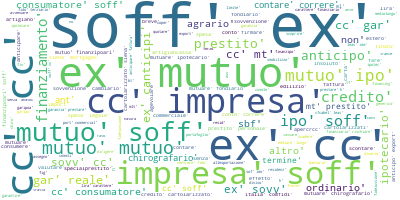

In [134]:
# Generate a word cloud
wordcloud.generate(long_string1)
# Visualize it
wordcloud.to_image()

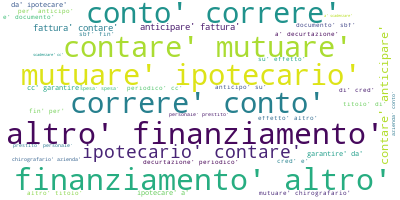

In [135]:
# Generate a word cloud
wordcloud.generate(long_string2)
wordcloud.to_image()

# 2. Topic modeling:

## 2.1 Topic modeling introduction:

In [136]:
# new df:
df_new = df[['LOAN_TYPE_lemmatized','clustering_lemmatized']].copy()
df_new.head()

,LOAN_TYPE_lemmatized,clustering_lemmatized
0,"[speciale, agrario, mediare, lungo]","[altro, finanziamento]"
2,"[sofferenza, non, ripartire, clientela]","[altro, finanziamento]"
3,"[sovvenzione, microcredito]","[altro, finanziamento]"
4,"[credito, agrario, miglioramento]","[altro, finanziamento]"
5,"[finanziamento, chirografario, mlt]","[altro, finanziamento]"


In [137]:
# perform detokenization:
from nltk.tokenize.treebank import TreebankWordDetokenizer

In [138]:
df_new['LOAN_TYPE'] = df_new['LOAN_TYPE_lemmatized'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
df_new['clustering'] = df_new['clustering_lemmatized'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))

In [139]:
df_new.head()

,LOAN_TYPE_lemmatized,clustering_lemmatized,LOAN_TYPE,clustering
0,"[speciale, agrario, mediare, lungo]","[altro, finanziamento]",speciale agrario mediare lungo,altro finanziamento
2,"[sofferenza, non, ripartire, clientela]","[altro, finanziamento]",sofferenza non ripartire clientela,altro finanziamento
3,"[sovvenzione, microcredito]","[altro, finanziamento]",sovvenzione microcredito,altro finanziamento
4,"[credito, agrario, miglioramento]","[altro, finanziamento]",credito agrario miglioramento,altro finanziamento
5,"[finanziamento, chirografario, mlt]","[altro, finanziamento]",finanziamento chirografario mlt,altro finanziamento


In [140]:
df_new[['LOAN_TYPE','clustering']].sample(10)

,LOAN_TYPE,clustering
732,scontare effetto commerciale,fin per anticipo su effetto altro titolo di cr...
197,soff garanzia prestare h,altro finanziamento
430,soff ex cc cc impresa,conto correre
214,cc ipotecario,cc garantire da ipotecare a decurtazione perio...
725,ant sbf inc natura commle supp magn,fin per anticipo su effetto altro titolo di cr...
597,soff ex mutuo,contare mutuare ipotecario
641,soff ex mutuo finanzipoari,contare mutuare ipotecario
4,credito agrario miglioramento,altro finanziamento
479,ant lira allesportazione,contare anticipare fattura
689,soff ex mutuo mutuo tf rivedere,contare mutuare ipotecario


In [141]:
df_new.shape

(767, 4)

In [142]:
# how many groups should I consider for topic modeling?
cluster_per_loans = df_new.groupby('clustering')[['LOAN_TYPE']].count()
cluster_per_loans = cluster_per_loans.sort_values(["LOAN_TYPE"], ascending = False)
cluster_per_loans

,LOAN_TYPE
clustering,
altro finanziamento,213
contare mutuare ipotecario,183
conto correre,183
contare anticipare fattura,69
cc garantire da ipotecare a decurtazione periodico,25
fin per anticipo su effetto altro titolo di cred e documento sbf,22
conto mutuare chirografario azienda,16
spesa,15
prestito personale,14


In [143]:
# there are 10 groups out of 17 that have = or more than 10 observations. 
# I consider only these 10 groups and I remove the groups with less than 10 observations.

df_sub = df_new.groupby('clustering').filter(lambda x: x.shape[0] >= 10)
df_sub

,LOAN_TYPE_lemmatized,clustering_lemmatized,LOAN_TYPE,clustering
0,"[speciale, agrario, mediare, lungo]","[altro, finanziamento]",speciale agrario mediare lungo,altro finanziamento
2,"[sofferenza, non, ripartire, clientela]","[altro, finanziamento]",sofferenza non ripartire clientela,altro finanziamento
3,"[sovvenzione, microcredito]","[altro, finanziamento]",sovvenzione microcredito,altro finanziamento
4,"[credito, agrario, miglioramento]","[altro, finanziamento]",credito agrario miglioramento,altro finanziamento
5,"[finanziamento, chirografario, mlt]","[altro, finanziamento]",finanziamento chirografario mlt,altro finanziamento
...,...,...,...,...
763,"[rapportare, spesa]",[spesa],rapportare spesa,spesa
764,"[spesa, legale, medio]",[spesa],spesa legale medio,spesa
765,"[spesa, fidejussione, favore, terzo]",[spesa],spesa fidejussione favore terzo,spesa
766,"[spesa, legale, extracontabili]",[spesa],spesa legale extracontabili,spesa


In [144]:
cluster_per_loans = df_sub.groupby('clustering')[['LOAN_TYPE']].count()
cluster_per_loans = cluster_per_loans.sort_values(["LOAN_TYPE"], ascending = False)
cluster_per_loans
# correct!

,LOAN_TYPE
clustering,
altro finanziamento,213
contare mutuare ipotecario,183
conto correre,183
contare anticipare fattura,69
cc garantire da ipotecare a decurtazione periodico,25
fin per anticipo su effetto altro titolo di cred e documento sbf,22
conto mutuare chirografario azienda,16
spesa,15
prestito personale,14


In [145]:
df_sub.shape # From 767 to 750. I removed 17 records.

(750, 4)

## 2.2 Pre-processing:

### 2.2.1 CountVectorizer:

In [146]:
from sklearn.feature_extraction.text import CountVectorizer

**max_df**: float in range [0.0, 1.0] or int, default=1.0
When building the vocabulary ignore terms that have a document frequency strictly higher than the given threshold (corpus-specific stop words). If float, the parameter represents a proportion of documents, integer absolute counts. This parameter is ignored if vocabulary is not None.

**min_df**: float in range [0.0, 1.0] or int, default=1
When building the vocabulary ignore terms that have a document frequency strictly lower than the given threshold. This value is also called cut-off in the literature. If float, the parameter represents a proportion of documents, integer absolute counts. This parameter is ignored if vocabulary is not None.

In [147]:
cv = CountVectorizer(max_df=0.95, min_df=2)

In [148]:
dtm_cv = cv.fit_transform(df_sub['LOAN_TYPE'])

In [149]:
dtm_cv

<750x204 sparse matrix of type '<class 'numpy.int64'>'
	with 2407 stored elements in Compressed Sparse Row format>

In [150]:
loan_type_list = df_sub['LOAN_TYPE'].tolist()
clustering_list = df_sub['clustering'].tolist()

In [151]:
vec = CountVectorizer()
X = vec.fit_transform(loan_type_list)

In [152]:
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

,abitazione,accettazionitratte,accounts,advance,affidare,agev,agevolare,agr,agrario,agrarioipotecario,...,tutto,up,usare,valcvalutario,valutare,valutario,vario,varo,vinc,vincolato
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
746,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
747,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
748,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [153]:
vec = CountVectorizer()
Y = vec.fit_transform(clustering_list)

In [154]:
pd.DataFrame(Y.toarray(), columns=vec.get_feature_names())

,altro,anticipare,anticipo,azienda,cc,chirografario,contare,conto,correre,cred,...,mutuare,per,periodico,personale,prestito,sbf,scadenzare,spesa,su,titolo
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
746,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
747,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
748,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


### 2.2.2 Tfi-df Vectorizer

In [155]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [156]:
tfidf = TfidfVectorizer(max_df=0.95, min_df=2)

In [157]:
dtm_tfidf = tfidf.fit_transform(df_sub['LOAN_TYPE'])

In [158]:
dtm_tfidf

<750x204 sparse matrix of type '<class 'numpy.float64'>'
	with 2407 stored elements in Compressed Sparse Row format>

In [159]:
vec = TfidfVectorizer()
X = vec.fit_transform(loan_type_list)
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

,abitazione,accettazionitratte,accounts,advance,affidare,agev,agevolare,agr,agrario,agrarioipotecario,...,tutto,up,usare,valcvalutario,valutare,valutario,vario,varo,vinc,vincolato
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.413902,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.537921,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
746,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
747,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
748,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [160]:
vec = TfidfVectorizer()
Y = vec.fit_transform(clustering_list)
pd.DataFrame(Y.toarray(), columns=vec.get_feature_names())

,altro,anticipare,anticipo,azienda,cc,chirografario,contare,conto,correre,cred,...,mutuare,per,periodico,personale,prestito,sbf,scadenzare,spesa,su,titolo
0,0.691257,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.691257,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.691257,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.691257,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.691257,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
746,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
747,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
748,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## 2.3 Latent Dirichlet Association

In [161]:
from sklearn.decomposition import LatentDirichletAllocation

In [162]:
LDA = LatentDirichletAllocation(n_components=10,random_state=42)

In [163]:
LDA.fit(dtm_cv)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=10, n_jobs=None,
                          perp_tol=0.1, random_state=42, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [164]:
#Showing Stored Words

In [165]:
len(cv.get_feature_names())

204

In [166]:
import random

In [167]:
for i in range(10):
    random_word_id = random.randint(0,54)
    print(cv.get_feature_names()[random_word_id])

cambiario
chirograf
attenuare
commerciale
cedere
cfcabel
altro
ante
contare
commerciale


In [168]:
for i in range(10):
    random_word_id = random.randint(0,54)
    print(cv.get_feature_names()[random_word_id])

cartolarizzati
ante
commercialc
cart
antfatture
assegno
altro
consumere
breve
anatocismo


In [169]:
#Showing Top Words Per Topic

In [170]:
len(LDA.components_)

10

In [171]:
LDA.components_

array([[0.1       , 0.1       , 0.1       , ..., 0.1       , 0.1       ,
        0.1       ],
       [0.1       , 0.10001363, 0.10001558, ..., 0.1       , 0.1       ,
        0.1       ],
       [0.1       , 0.1       , 0.1       , ..., 0.1       , 5.09997547,
        2.09999559],
       ...,
       [0.1       , 0.1       , 0.1       , ..., 0.1       , 5.10001344,
        0.1       ],
       [0.1       , 0.1       , 0.1       , ..., 0.1       , 0.1       ,
        0.1       ],
       [0.1       , 0.10005992, 9.09998029, ..., 0.1       , 0.10000717,
        0.1       ]])

In [172]:
len(LDA.components_[0])

204

In [173]:
single_topic = LDA.components_[0]

In [174]:
# Returns the indices that would sort this array.
single_topic.argsort()

array([169, 115,  49, 157, 187, 141, 201, 148, 171, 144,  71,   3, 151,
       158,  30, 167,   0, 195,  79, 189,  37,  31,  92,   5, 103, 140,
       182,  19, 181, 127,  39, 106,  48,  46, 105,  77, 133, 199,  13,
       136, 180, 152,  58,   7, 129,  33,  90,  63, 168, 135, 139,  34,
       110, 174,  62, 193, 145, 100,   6,  28,  10,  22, 196,  98, 198,
       137, 112, 172, 186, 176, 118, 134, 128, 156,  52,  25, 154,  68,
       123, 163, 138, 153,  78,  24, 192,   2,  70,  57, 194,  60, 114,
        45,  56,  89,  82,  27,  26,  72, 120,  93,  38,  12,  87, 119,
       170,  69, 117, 116,  94,  83,  23, 188,  81,  95, 113, 202, 155,
        40,  54, 191, 108, 178, 149,  20,  64, 177,  18,  59,  11, 132,
       164,  51, 131, 166,  53, 200,  88, 104, 203, 146, 190,  47, 124,
        21, 147,  84,   1, 175, 165,  91,  66, 197, 126,  17,  32, 161,
        43,  41, 185, 143, 142,  42, 130, 125,  44, 109,  14,  76,  61,
        86, 159,   4,   8, 179,  74,   9, 107,  80,  15, 183,  6

In [175]:
# Word least representative of this topic
single_topic[169]

0.10000000002803332

In [176]:
# Word most representative of this topic
single_topic[35]

303.731047409722

In [177]:
# Top 10 words for this topic:
single_topic.argsort()[-10:]

array([160, 101,  50, 162,  29,  97, 111,  73, 184,  35])

In [178]:
top_word_indices = single_topic.argsort()[-10:]

In [179]:
for index in top_word_indices:
    print(cv.get_feature_names()[index])

quotare
garipo
consumatore
reale
canticipi
gar
impresa
ex
soff
cc


In [180]:
# provare con meno parole - parole per loan type
for index,topic in enumerate(LDA.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print([cv.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')

THE TOP 15 WORDS FOR TOPIC #0
['fare', 'donore', 'garipoa', 'contributo', 'fruttifero', 'quotare', 'garipo', 'consumatore', 'reale', 'canticipi', 'gar', 'impresa', 'ex', 'soff', 'cc']


THE TOP 15 WORDS FOR TOPIC #1
['finanz', 'port', 'artigiancassa', 'bt', 'commercial', 'trance', 'edilizio', 'ipotecario', 'firmare', 'mortgages', 'cartolarizzato', 'siena', 'chirografario', 'mutuare', 'credito']


THE TOP 15 WORDS FOR TOPIC #2
['chirografario', 'ipoari', 'smobilizzo', 'carattere', 'mlt', 'no', 'finanziario', 'valutare', 'senza', 'lira', 'ipotecario', 'contare', 'correre', 'altro', 'finanziamento']


THE TOP 15 WORDS FOR TOPIC #3
['inter', 'port', 'no', 'generico', 'fidejussione', 'limite', 'prestare', 'soff', 'garipoa', 'garantire', 'ipotecare', 'sof', 'cc', 'imo', 'garanzia']


THE TOP 15 WORDS FOR TOPIC #4
['donore', 'agev', 'operazione', 'tf', 'residenziale', 'ipopmis', 'cost', 'rato', 'residenz', 'non', 'cartolarizzati', 'ipo', 'ex', 'soff', 'mutuo']


THE TOP 15 WORDS FOR TOPIC #5


In [181]:
# Attaching Discovered Topic Labels to Original data

In [182]:
dtm_cv.shape

(750, 204)

In [183]:
len(df_sub)

750

In [184]:
topic_results = LDA.transform(dtm_cv)

In [185]:
topic_results.shape

(750, 10)

In [186]:
topic_results[0]

array([0.02      , 0.02000126, 0.02      , 0.02      , 0.02      ,
       0.02      , 0.02000343, 0.02      , 0.81999393, 0.02000138])

In [187]:
topic_results[0].round(2)

array([0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.82, 0.02])

In [188]:
topic_results[0].argmax() 
# this means that our model things that the first sentence belongs to topic 8

8

In [189]:
# Combining with Original Data

In [190]:
topic_results.argmax(axis=1)

array([8, 4, 9, 1, 2, 7, 2, 6, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 6, 2, 6, 7,
       8, 6, 8, 2, 3, 1, 6, 8, 9, 9, 3, 3, 6, 0, 3, 2, 3, 9, 9, 1, 9, 9,
       0, 1, 9, 2, 1, 8, 1, 2, 2, 1, 2, 1, 0, 5, 3, 7, 6, 2, 0, 1, 1, 1,
       2, 8, 9, 1, 8, 1, 0, 8, 1, 0, 7, 1, 2, 6, 9, 9, 1, 1, 3, 9, 6, 9,
       2, 2, 1, 2, 2, 8, 1, 0, 0, 6, 6, 1, 1, 6, 2, 0, 7, 2, 0, 6, 7, 9,
       6, 3, 6, 0, 8, 2, 7, 8, 0, 9, 1, 2, 9, 1, 1, 8, 0, 1, 1, 7, 0, 6,
       1, 1, 1, 6, 3, 1, 2, 4, 9, 5, 6, 2, 5, 9, 8, 7, 7, 9, 8, 2, 2, 4,
       9, 8, 1, 0, 8, 8, 9, 4, 3, 3, 6, 7, 4, 7, 9, 1, 1, 8, 1, 0, 3, 0,
       3, 8, 7, 0, 6, 1, 3, 2, 5, 4, 7, 1, 9, 6, 1, 3, 4, 6, 8, 9, 3, 4,
       6, 2, 8, 0, 6, 1, 1, 7, 8, 0, 6, 1, 3, 3, 6, 0, 0, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 9, 3,
       2, 2, 1, 0, 0, 2, 2, 7, 1, 7, 9, 7, 7, 2, 0, 0, 7, 7, 0, 7, 3, 0,
       2, 8, 6, 3, 7, 1, 2, 0, 6, 8, 1, 0, 8, 5, 6, 2, 0, 7, 7, 0, 0, 0,
       5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0,

In [191]:
df_sub['Topic_LDA'] = topic_results.argmax(axis=1)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [192]:
df_sub.head(10)

,LOAN_TYPE_lemmatized,clustering_lemmatized,LOAN_TYPE,clustering,Topic_LDA
0,"[speciale, agrario, mediare, lungo]","[altro, finanziamento]",speciale agrario mediare lungo,altro finanziamento,8
2,"[sofferenza, non, ripartire, clientela]","[altro, finanziamento]",sofferenza non ripartire clientela,altro finanziamento,4
3,"[sovvenzione, microcredito]","[altro, finanziamento]",sovvenzione microcredito,altro finanziamento,9
4,"[credito, agrario, miglioramento]","[altro, finanziamento]",credito agrario miglioramento,altro finanziamento,1
5,"[finanziamento, chirografario, mlt]","[altro, finanziamento]",finanziamento chirografario mlt,altro finanziamento,2
6,"[sovvenzione, scadenzare, determinato]","[altro, finanziamento]",sovvenzione scadenzare determinato,altro finanziamento,7
7,"[finanziamento, lira, carattere, finanziario]","[altro, finanziamento]",finanziamento lira carattere finanziario,altro finanziamento,2
8,"[agrario, breve, termine]","[altro, finanziamento]",agrario breve termine,altro finanziamento,6
9,"[altro, finanzfamiglie, impresa, garantito]","[altro, finanziamento]",altro finanzfamiglie impresa garantito,altro finanziamento,2
10,"[altro, finanziamento]","[altro, finanziamento]",altro finanziamento,altro finanziamento,2


## 2.4 Non-Negative Matrix Factorization

In [193]:
from sklearn.decomposition import NMF

In [194]:
nmf_model = NMF(n_components=10,random_state=42)

In [195]:
nmf_model.fit(dtm_tfidf)

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=10, random_state=42, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

In [196]:
# Displaying Topics

In [197]:
len(tfidf.get_feature_names())

204

In [198]:
import random

In [199]:
for i in range(10):
    random_word_id = random.randint(0,54)
    print(tfidf.get_feature_names()[random_word_id])

bancario
bancario
ass
agrario
anatoc
artigiancassa
cartolarizzato
conto
canticipi
artigianfidi


In [200]:
for i in range(10):
    random_word_id = random.randint(0,54)
    print(tfidf.get_feature_names()[random_word_id])

centrare
chiro
artigiancassa
artigiancredito
agevolare
cambiario
agevolare
artigiano
cartolarizzato
consumit


In [201]:
len(nmf_model.components_)

10

In [202]:
nmf_model.components_

array([[0.01009727, 0.        , 0.        , ..., 0.        , 0.        ,
        0.00053936],
       [0.        , 0.00175556, 0.00083195, ..., 0.        , 0.00596449,
        0.00280057],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00552005],
       ...,
       [0.        , 0.        , 0.        , ..., 0.00189107, 0.12932373,
        0.        ],
       [0.        , 0.00528914, 0.        , ..., 0.        , 0.11847064,
        0.        ],
       [0.        , 0.00462382, 0.01617331, ..., 0.        , 0.001572  ,
        0.        ]])

In [203]:
len(nmf_model.components_[0])

204

In [204]:
single_topic = nmf_model.components_[0]

In [205]:
# Returns the indices that would sort this array.
single_topic.argsort()

array([168,  96,  97, 183, 182, 202, 160, 103, 104, 105, 159, 169, 156,
       181, 110, 180,  95, 112,  94,  92,  77,  78,  79,  80,  81,  82,
        83, 167, 185,  86,  87,  88,  89,  90,  91,  93, 186, 113, 115,
       152, 136, 137, 138, 139, 140, 174, 142, 143, 144, 145, 172, 147,
       148, 149, 134, 114, 133, 131, 170, 117, 118, 119, 120, 179, 177,
       123, 124, 176, 126, 154, 153, 129, 175, 132, 171,  75, 188,  20,
        21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,
        34,  19, 197,  18, 198,   1,   2,   3,   4,   5,   6,   7, 201,
       200,  10,  11, 166,  13, 199,  15,  17, 196,  37,  38, 163,  59,
        60, 162,  62,  63,  64, 189,  66, 161,  68,  69,  70,  71,  72,
        57,  56,  55,  54, 165, 195,  41,  42,  43, 194, 193,  74, 192,
        48,  49, 164,  51,  52,  53,  47, 151, 100,  84, 108, 127, 106,
        39, 128, 107,  12,  58, 116, 203, 190,  67, 135, 158, 191, 102,
       101,  76,  44, 125,  46,  14,  40,   9,  99, 130,  45, 17

In [206]:
# Word least representative of this topic
single_topic[168]

0.0

In [207]:
# Word most representative of this topic
single_topic[35]

3.064471252019692

In [208]:
# Top 10 words for this topic:
single_topic.argsort()[-10:]

array([ 36, 122, 187, 141, 150,  50, 184,  73, 111,  35])

In [209]:
top_word_indices = single_topic.argsort()[-10:]

In [210]:
for index in top_word_indices:
    print(tfidf.get_feature_names()[index])

cedere
ipotecario
sovv
mt
ordinario
consumatore
soff
ex
impresa
cc


In [211]:
for index,topic in enumerate(nmf_model.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print([tfidf.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')

THE TOP 15 WORDS FOR TOPIC #0
['sbf', 'affidare', 'ap', 'ipotecare', 'altro', 'cedere', 'ipotecario', 'sovv', 'mt', 'ordinario', 'consumatore', 'soff', 'ex', 'impresa', 'cc']


THE TOP 15 WORDS FOR TOPIC #1
['commercial', 'tf', 'port', 'rato', 'cost', 'chirografario', 'ipopmis', 'no', 'ipoari', 'cartolarizzati', 'finanzipo', 'finanzipoari', 'ex', 'soff', 'mutuo']


THE TOP 15 WORDS FOR TOPIC #2
['prestare', 'consumatore', 'mt', 'sovv', 'commercialc', 'spesa', 'anticipo', 'coper', 'export', 'commercial', 'port', 'fare', 'ex', 'soff', 'canticipi']


THE TOP 15 WORDS FOR TOPIC #3
['pr', 'chiro', 'insoluto', 'duso', 'tassare', 'agevolare', 'donore', 'agrario', 'cc', 'ex', 'soff', 'personale', 'sovv', 'mt', 'prestito']


THE TOP 15 WORDS FOR TOPIC #4
['chiro', 'cambiario', 'mutuo', 'agevolare', 'tf', 'cartolarizzazione', 'comfidi', 'conto', 'correre', 'contare', 'non', 'fondiario', 'chirografario', 'ipotecario', 'mutuare']


THE TOP 15 WORDS FOR TOPIC #5
['cedere', 'commercial', 'ordinario'

In [212]:
# Attaching Discovered Topic Labels to Original Article

In [213]:
dtm_tfidf.shape

(750, 204)

In [214]:
len(df_sub)

750

In [215]:
topic_results = nmf_model.transform(dtm_tfidf)

In [216]:
topic_results.shape

(750, 10)

In [217]:
topic_results[0]

array([0.        , 0.        , 0.        , 0.01324898, 0.00112531,
       0.        , 0.01050557, 0.        , 0.0514633 , 0.00031519])

In [218]:
topic_results[0].round(2)

array([0.  , 0.  , 0.  , 0.01, 0.  , 0.  , 0.01, 0.  , 0.05, 0.  ])

In [219]:
topic_results[0].argmax()
# This means that our model thinks that the first article belongs to topic 8.

8

In [220]:
# Combining with Original Data

In [221]:
topic_results.argmax(axis=1)

array([8, 4, 4, 6, 8, 4, 8, 8, 8, 8, 8, 8, 3, 8, 8, 8, 6, 6, 3, 8, 3, 6,
       7, 8, 0, 8, 8, 6, 7, 3, 7, 3, 2, 8, 3, 0, 2, 8, 2, 6, 3, 6, 7, 8,
       0, 6, 8, 6, 8, 7, 6, 8, 8, 4, 8, 6, 0, 1, 6, 7, 3, 8, 0, 6, 6, 6,
       2, 8, 8, 6, 8, 8, 0, 7, 6, 0, 8, 6, 1, 8, 3, 4, 1, 6, 7, 3, 6, 8,
       8, 8, 4, 6, 8, 9, 6, 0, 0, 6, 7, 6, 6, 3, 2, 0, 8, 8, 2, 8, 3, 8,
       8, 1, 3, 0, 7, 8, 8, 4, 0, 3, 6, 7, 8, 6, 6, 8, 0, 6, 6, 0, 0, 3,
       4, 6, 6, 3, 8, 8, 8, 1, 4, 6, 8, 6, 6, 8, 6, 7, 7, 7, 1, 4, 8, 8,
       4, 7, 6, 0, 3, 3, 8, 1, 7, 7, 3, 7, 1, 4, 8, 6, 1, 3, 8, 0, 1, 0,
       1, 8, 6, 0, 3, 6, 1, 8, 6, 1, 8, 6, 3, 8, 1, 1, 1, 8, 9, 1, 1, 1,
       8, 8, 1, 0, 3, 6, 1, 0, 2, 0, 8, 6, 7, 7, 6, 4, 5, 0, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 6, 3, 0,
       7, 4, 6, 5, 4, 7, 7, 0, 6, 7, 8, 7, 0, 7, 0, 0, 7, 7, 0, 7, 0, 0,
       7, 7, 7, 0, 7, 6, 8, 0, 6, 7, 6, 0, 7, 3, 6, 7, 0, 0, 7, 0, 0, 0,
       3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0,

In [222]:
df_sub['Topic_NMF'] = topic_results.argmax(axis=1)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [223]:
df_sub.head(10)

,LOAN_TYPE_lemmatized,clustering_lemmatized,LOAN_TYPE,clustering,Topic_LDA,Topic_NMF
0,"[speciale, agrario, mediare, lungo]","[altro, finanziamento]",speciale agrario mediare lungo,altro finanziamento,8,8
2,"[sofferenza, non, ripartire, clientela]","[altro, finanziamento]",sofferenza non ripartire clientela,altro finanziamento,4,4
3,"[sovvenzione, microcredito]","[altro, finanziamento]",sovvenzione microcredito,altro finanziamento,9,4
4,"[credito, agrario, miglioramento]","[altro, finanziamento]",credito agrario miglioramento,altro finanziamento,1,6
5,"[finanziamento, chirografario, mlt]","[altro, finanziamento]",finanziamento chirografario mlt,altro finanziamento,2,8
6,"[sovvenzione, scadenzare, determinato]","[altro, finanziamento]",sovvenzione scadenzare determinato,altro finanziamento,7,4
7,"[finanziamento, lira, carattere, finanziario]","[altro, finanziamento]",finanziamento lira carattere finanziario,altro finanziamento,2,8
8,"[agrario, breve, termine]","[altro, finanziamento]",agrario breve termine,altro finanziamento,6,8
9,"[altro, finanzfamiglie, impresa, garantito]","[altro, finanziamento]",altro finanzfamiglie impresa garantito,altro finanziamento,2,8
10,"[altro, finanziamento]","[altro, finanziamento]",altro finanziamento,altro finanziamento,2,8


In [224]:
df_sub[['LOAN_TYPE','clustering','Topic_NMF']].head(10)

,LOAN_TYPE,clustering,Topic_NMF
0,speciale agrario mediare lungo,altro finanziamento,8
2,sofferenza non ripartire clientela,altro finanziamento,4
3,sovvenzione microcredito,altro finanziamento,4
4,credito agrario miglioramento,altro finanziamento,6
5,finanziamento chirografario mlt,altro finanziamento,8
6,sovvenzione scadenzare determinato,altro finanziamento,4
7,finanziamento lira carattere finanziario,altro finanziamento,8
8,agrario breve termine,altro finanziamento,8
9,altro finanzfamiglie impresa garantito,altro finanziamento,8
10,altro finanziamento,altro finanziamento,8


## 2.5 Latent semantic analysis:

In [225]:
from sklearn.decomposition import TruncatedSVD

In [226]:
LSA = TruncatedSVD(n_components=10,random_state=42)

In [227]:
LSA.fit(dtm_cv)

TruncatedSVD(algorithm='randomized', n_components=10, n_iter=5, random_state=42,
             tol=0.0)

In [228]:
#Showing Top Words Per Topic

In [229]:
len(LSA.components_)

10

In [230]:
LSA.components_

array([[ 1.02324985e-03,  2.19717923e-04,  4.94654678e-04, ...,
         3.58176094e-08,  1.09080703e-03,  4.39034607e-04],
       [-2.45535251e-03,  1.60105874e-03,  3.21425048e-03, ...,
         1.35882124e-08,  2.50686612e-03,  4.45080187e-04],
       [-7.96341776e-03, -4.03723410e-03, -3.00190800e-03, ...,
         7.60091102e-05,  3.46577327e-03,  4.24969120e-03],
       ...,
       [ 5.84921235e-03, -7.21666055e-03, -1.63279670e-02, ...,
         1.40608958e-03,  4.51135706e-02, -3.93637616e-03],
       [-1.53410645e-03,  5.63220631e-03,  2.26272970e-03, ...,
         1.95251933e-04,  4.14948839e-02, -7.19930364e-04],
       [ 2.10163476e-03,  4.21405754e-03,  2.11485595e-03, ...,
         6.41183025e-04, -1.45588652e-02, -6.98574248e-03]])

In [231]:
len(LSA.components_[0])

204

In [232]:
single_topic = LSA.components_[0]

In [233]:
# Returns the indices that would sort this array.
single_topic.argsort()

array([126, 131, 170, 166,  92,  77,  20, 113, 152,  90,  24, 148, 201,
        23,  62, 174,  96,  17,  13, 129, 185, 136, 176,  81, 160,  55,
         7, 168,  95,  78, 169, 115, 112, 172,  83, 145, 186, 103, 189,
        18,  49,  25,   6, 175, 132, 156, 133, 183,  22,  66, 200, 180,
       196, 167,  43, 110,  19, 188,  64, 139, 177, 198,  48, 190,  30,
        10,  56,  28, 192,  38,  91, 137, 144, 171,  37,  57,  63,  87,
        79, 195, 105, 120,  47, 104,  72,  11, 182,  93, 134,  70,  68,
        52, 151,   3,  71,   5,  41, 199, 114, 193, 154,  99,  21,  82,
         1,  69,  54, 194,  85, 165, 124, 203, 108,  59,  26,  53,  74,
         2, 178,   9,  33,  65,  44, 125,  67,  86,  76,  80, 179, 138,
        34, 116,  12, 107, 135,  31, 127, 106,  39,  27, 153,  51,  14,
       130,  98,   0,  16, 202,  94, 142,   8, 149, 123, 163, 164, 158,
        84, 100, 140, 109, 181,   4, 197, 147,  46,  42, 128, 121, 119,
        60, 161, 191,  58,  36,  32, 173, 157,  40,  88, 150,  4

In [234]:
# Word least representative of this topic
single_topic[126]

-2.1482129215058746e-17

In [235]:
# Word most representative of this topic
single_topic[35]

0.6011992585068981

In [236]:
# Top 10 words for this topic:
single_topic.argsort()[-10:]

array([187,  50, 162,  97, 117, 111, 143,  73, 184,  35])

In [237]:
top_word_indices = single_topic.argsort()[-10:]

In [238]:
for index in top_word_indices:
    print(cv.get_feature_names()[index])

sovv
consumatore
reale
gar
ipo
impresa
mutuo
ex
soff
cc


In [239]:
for index,topic in enumerate(LSA.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print([cv.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')

THE TOP 15 WORDS FOR TOPIC #0
['garipo', 'finanzipoari', 'prestito', 'canticipi', 'mt', 'sovv', 'consumatore', 'reale', 'gar', 'ipo', 'impresa', 'mutuo', 'ex', 'soff', 'cc']


THE TOP 15 WORDS FOR TOPIC #1
['finanzipo', 'ipopmis', 'cost', 'rato', 'chirografario', 'ipotecario', 'cartolarizzati', 'no', 'ipoari', 'canticipi', 'finanzipoari', 'ipo', 'ex', 'soff', 'mutuo']


THE TOP 15 WORDS FOR TOPIC #2
['siena', 'finanzipoari', 'commercial', 'fare', 'port', 'credito', 'anticipo', 'gar', 'reale', 'prestito', 'mt', 'sovv', 'canticipi', 'ex', 'soff']


THE TOP 15 WORDS FOR TOPIC #3
['lira', 'conto', 'agevolare', 'estero', 'edilizio', 'finanziamento', 'ipotecario', 'agrario', 'fondiario', 'senza', 'trance', 'mortgages', 'cartolarizzato', 'siena', 'credito']


THE TOP 15 WORDS FOR TOPIC #4
['chirografario', 'insoluto', 'non', 'termine', 'tassare', 'agrario', 'agevolare', 'ipotecario', 'ipo', 'personale', 'mutuo', 'cc', 'mt', 'sovv', 'prestito']


THE TOP 15 WORDS FOR TOPIC #5
['garantire', 'no

In [240]:
# Attaching Discovered Topic Labels to Original Articles

In [241]:
dtm_cv.shape

(750, 204)

In [242]:
len(df_sub)

750

In [243]:
topic_results = LSA.transform(dtm_cv)

In [244]:
topic_results.shape

(750, 10)

In [245]:
topic_results[0]

array([ 0.00146271,  0.0024571 , -0.00378689,  0.08419166,  0.11175437,
       -0.00450221,  0.11190054, -0.0361648 ,  0.21029294, -0.09816223])

In [246]:
topic_results[0].round(2)

array([ 0.  ,  0.  , -0.  ,  0.08,  0.11, -0.  ,  0.11, -0.04,  0.21,
       -0.1 ])

In [247]:
topic_results[0].argmax() 
# this means that our model things that the first sentence belongs to topic 8

8

In [248]:
# Combining with Original Data

In [249]:
topic_results.argmax(axis=1)

array([8, 6, 6, 3, 8, 6, 8, 8, 0, 8, 8, 0, 4, 6, 8, 8, 3, 3, 4, 0, 4, 8,
       6, 8, 9, 8, 6, 3, 6, 4, 6, 4, 2, 2, 4, 0, 2, 8, 2, 3, 4, 3, 6, 8,
       0, 3, 4, 3, 3, 7, 3, 8, 8, 6, 8, 3, 0, 0, 9, 6, 4, 8, 0, 3, 3, 3,
       2, 8, 6, 3, 8, 3, 0, 7, 3, 0, 8, 3, 0, 8, 4, 6, 0, 3, 7, 4, 9, 8,
       6, 8, 6, 3, 8, 8, 3, 0, 0, 9, 6, 3, 3, 4, 2, 0, 8, 8, 8, 4, 4, 8,
       3, 0, 4, 0, 6, 8, 6, 6, 0, 4, 3, 6, 4, 3, 3, 8, 0, 3, 3, 7, 0, 4,
       6, 3, 3, 4, 8, 8, 8, 0, 6, 0, 8, 3, 0, 8, 3, 7, 7, 7, 0, 6, 8, 8,
       6, 8, 3, 0, 4, 4, 8, 0, 6, 7, 4, 6, 0, 6, 8, 3, 0, 4, 8, 0, 0, 0,
       0, 8, 8, 0, 4, 3, 0, 8, 0, 0, 8, 3, 4, 8, 0, 0, 0, 3, 8, 1, 0, 0,
       8, 6, 0, 0, 4, 3, 0, 7, 2, 0, 6, 3, 9, 9, 3, 0, 5, 0, 5, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 0,
       6, 6, 3, 0, 0, 6, 6, 0, 3, 6, 6, 6, 0, 6, 0, 0, 6, 6, 0, 6, 0, 0,
       6, 6, 6, 0, 6, 3, 0, 0, 3, 6, 3, 0, 6, 0, 3, 6, 0, 0, 6, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [250]:
df_sub['Topic_LSA'] = topic_results.argmax(axis=1)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [251]:
df_sub.head(10)

,LOAN_TYPE_lemmatized,clustering_lemmatized,LOAN_TYPE,clustering,Topic_LDA,Topic_NMF,Topic_LSA
0,"[speciale, agrario, mediare, lungo]","[altro, finanziamento]",speciale agrario mediare lungo,altro finanziamento,8,8,8
2,"[sofferenza, non, ripartire, clientela]","[altro, finanziamento]",sofferenza non ripartire clientela,altro finanziamento,4,4,6
3,"[sovvenzione, microcredito]","[altro, finanziamento]",sovvenzione microcredito,altro finanziamento,9,4,6
4,"[credito, agrario, miglioramento]","[altro, finanziamento]",credito agrario miglioramento,altro finanziamento,1,6,3
5,"[finanziamento, chirografario, mlt]","[altro, finanziamento]",finanziamento chirografario mlt,altro finanziamento,2,8,8
6,"[sovvenzione, scadenzare, determinato]","[altro, finanziamento]",sovvenzione scadenzare determinato,altro finanziamento,7,4,6
7,"[finanziamento, lira, carattere, finanziario]","[altro, finanziamento]",finanziamento lira carattere finanziario,altro finanziamento,2,8,8
8,"[agrario, breve, termine]","[altro, finanziamento]",agrario breve termine,altro finanziamento,6,8,8
9,"[altro, finanzfamiglie, impresa, garantito]","[altro, finanziamento]",altro finanzfamiglie impresa garantito,altro finanziamento,2,8,0
10,"[altro, finanziamento]","[altro, finanziamento]",altro finanziamento,altro finanziamento,2,8,8


In [252]:
df_sub[['LOAN_TYPE','clustering','Topic_LSA']].head(10)

,LOAN_TYPE,clustering,Topic_LSA
0,speciale agrario mediare lungo,altro finanziamento,8
2,sofferenza non ripartire clientela,altro finanziamento,6
3,sovvenzione microcredito,altro finanziamento,6
4,credito agrario miglioramento,altro finanziamento,3
5,finanziamento chirografario mlt,altro finanziamento,8
6,sovvenzione scadenzare determinato,altro finanziamento,6
7,finanziamento lira carattere finanziario,altro finanziamento,8
8,agrario breve termine,altro finanziamento,8
9,altro finanzfamiglie impresa garantito,altro finanziamento,0
10,altro finanziamento,altro finanziamento,8


## 2.6 Topic modeling conclusions:

In [253]:
# analisi classificazione documenti

In [254]:
df_sub.groupby('clustering')[['LOAN_TYPE']].count()

,LOAN_TYPE
clustering,
altro finanziamento,213
cc garantire da ipotecare a decurtazione periodico,25
cc garantire da ipotecare a scadenzare,10
contare anticipare fattura,69
contare mutuare ipotecario,183
conto correre,183
conto mutuare chirografario azienda,16
fin per anticipo su effetto altro titolo di cred e documento sbf,22
prestito personale,14


In [255]:
df_sub.groupby(['clustering']).median()

,Topic_LDA,Topic_NMF,Topic_LSA
clustering,,,
altro finanziamento,3.0,6.0,4.0
cc garantire da ipotecare a decurtazione periodico,0.0,5.0,0.0
cc garantire da ipotecare a scadenzare,1.5,4.5,3.0
contare anticipare fattura,7.0,7.0,6.0
contare mutuare ipotecario,4.0,1.0,1.0
conto correre,0.0,0.0,0.0
conto mutuare chirografario azienda,1.0,4.0,5.0
fin per anticipo su effetto altro titolo di cred e documento sbf,6.0,7.0,6.0
prestito personale,6.0,3.0,4.0


In [256]:
df_sub.groupby(['clustering']).mean()

,Topic_LDA,Topic_NMF,Topic_LSA
clustering,,,
altro finanziamento,4.075117,5.014085,4.342723
cc garantire da ipotecare a decurtazione periodico,0.120000,4.760000,0.400000
cc garantire da ipotecare a scadenzare,2.000000,4.600000,2.800000
contare anticipare fattura,4.449275,5.130435,4.246377
contare mutuare ipotecario,4.103825,3.513661,1.251366
conto correre,1.404372,1.295082,0.726776
conto mutuare chirografario azienda,1.875000,3.250000,5.125000
fin per anticipo su effetto altro titolo di cred e documento sbf,6.000000,6.409091,6.181818
prestito personale,5.142857,3.928571,3.928571


In [359]:
# clusters e LDA:
pd.crosstab(df_sub['clustering'],df_sub['Topic_LDA'],margins = True,margins_name = "Total")

Topic_LDA,0,1,2,3,4,5,6,7,8,9,Total
clustering,,,,,,,,,,,
altro finanziamento,21,41,34,18,8,4,26,15,22,24,213
cc garantire da ipotecare a decurtazione periodico,24,0,0,1,0,0,0,0,0,0,25
cc garantire da ipotecare a scadenzare,3,2,3,1,0,0,0,0,0,1,10
contare anticipare fattura,23,1,3,0,0,0,3,31,7,1,69
contare mutuare ipotecario,2,8,4,1,151,0,8,0,1,8,183
conto correre,132,4,6,2,0,19,5,11,3,1,183
conto mutuare chirografario azienda,1,10,0,0,5,0,0,0,0,0,16
fin per anticipo su effetto altro titolo di cred e documento sbf,2,2,1,0,0,0,7,2,0,8,22
prestito personale,0,3,0,0,0,0,9,1,1,0,14


cluster e LDA:
1. altro finaziamento: principalmente **topic 1 (41/213)**. Poco significativo
2. cc garantire da ipotecare a decurtazione periodico: **Topic 0, 24/25**. Ottimo.
3. cc garantire da ipotecare a scadenzare: **Topic 0-1-2**. Nessuna conclusione. 
4. contare anticipare fattura: **Topic 7. 31/69**, buono.
5. contare mutuare ipotecario: **Topic 4. 151/183**, ottimo.
6. conto correre: **Topic 0, 132/183**, ottimo. 
7. conto mutuare chirografario azienda: **Topic 1. 10/16**, ok.
8. fin per anticipo su effetto altro titolo di cred e documento sbf: **Topic 6-9**, nessuna conclusione.
9. prestito personale: **Topic 6. 9/14**, ok.
10. spesa: **topic 7. 7/15**, buono.

In [258]:
# clusters e NMF:
pd.crosstab(df_sub['clustering'],df_sub['Topic_NMF'],margins = True,margins_name = "Total")

Topic_NMF,0,1,2,3,4,5,6,7,8,9,Total
clustering,,,,,,,,,,,
altro finanziamento,22,21,7,23,12,0,45,20,61,2,213
cc garantire da ipotecare a decurtazione periodico,1,0,0,0,1,23,0,0,0,0,25
cc garantire da ipotecare a scadenzare,1,0,0,1,3,1,2,2,0,0,10
contare anticipare fattura,1,1,24,0,0,0,1,37,5,0,69
contare mutuare ipotecario,2,104,0,1,27,0,4,0,1,44,183
conto correre,137,0,0,20,0,0,7,17,2,0,183
conto mutuare chirografario azienda,1,2,0,2,11,0,0,0,0,0,16
fin per anticipo su effetto altro titolo di cred e documento sbf,2,0,0,1,0,0,0,14,5,0,22
prestito personale,0,0,0,10,0,0,3,1,0,0,14


cluster e NMF:
1. altro finaziamento: principalmente **topic 8 (61/213)**. Poco significativo
2. cc garantire da ipotecare a decurtazione periodico: **Topic 5, 23/25**. Ottimo.
3. cc garantire da ipotecare a scadenzare: **Topic 4-6-7**. Nessuna conclusione. 
4. contare anticipare fattura: **Topic 7. 37/69**, buono.
5. contare mutuare ipotecario: **Topic 1. 104/183**, ottimo.
6. conto correre: **Topic 0, 137/183**, ottimo. 
7. conto mutuare chirografario azienda: **Topic 4. 11/16**, ok.
8. fin per anticipo su effetto altro titolo di cred e documento sbf: **Topic 7, 14/22**,buono.
9. prestito personale: **Topic 3. 10/14**, ok.
10. spesa: **topic 1-2-6**, nessuna conclusione.

In [259]:
# clusters e LSA:
pd.crosstab(df_sub['clustering'],df_sub['Topic_LSA'],margins = True,margins_name = "Total")

Topic_LSA,0,1,2,3,4,5,6,7,8,9,Total
clustering,,,,,,,,,,,
altro finanziamento,45,1,7,41,26,0,29,9,49,6,213
cc garantire da ipotecare a decurtazione periodico,23,0,0,0,0,2,0,0,0,0,25
cc garantire da ipotecare a scadenzare,4,0,0,2,1,0,3,0,0,0,10
contare anticipare fattura,21,0,5,1,0,0,16,25,0,1,69
contare mutuare ipotecario,83,78,0,3,1,0,8,0,0,10,183
conto correre,157,0,0,7,1,0,18,0,0,0,183
conto mutuare chirografario azienda,1,5,0,0,2,0,1,0,0,7,16
fin per anticipo su effetto altro titolo di cred e documento sbf,2,0,0,0,1,0,9,2,8,0,22
prestito personale,0,0,0,3,10,0,1,0,0,0,14


cluster e LSA:
1. altro finaziamento: principalmente **topic 8 (49/213)**. Poco significativo
2. cc garantire da ipotecare a decurtazione periodico: **Topic 0, 23/25**. Ottimo.
3. cc garantire da ipotecare a scadenzare: **Topic 0-3-6**. Nessuna conclusione. 
4. contare anticipare fattura: **Topic 7. 25/69**, nessuna conclusione.
5. contare mutuare ipotecario: **Topic 0-1. 83/183**, nessuna conclusione.
6. conto correre: **Topic 0, 157/183**, ottimo. 
7. conto mutuare chirografario azienda: **Topic 9. 7/16**, ok.
8. fin per anticipo su effetto altro titolo di cred e documento sbf: **Topic 6-8**,nessuna conclusione.
9. prestito personale: **Topic 4. 10/14**, ok.
10. spesa: **topic 9, 9/15**, ok.

In [260]:
# analisi topic con grafico

In [261]:
topic_lda = df_sub.groupby('Topic_LDA')[['clustering']].count()
topic_lda = topic_lda.sort_values(["Topic_LDA"], ascending = True)
topic_lda

,clustering
Topic_LDA,
0,209
1,71
2,51
3,24
4,166
5,23
6,58
7,71
8,34


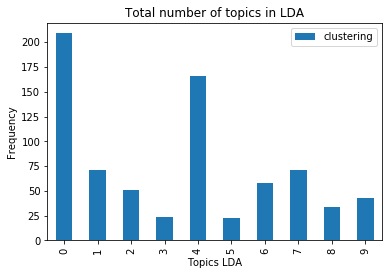

In [262]:
topic_lda.plot(kind='bar')
plt.xlabel('Topics LDA')
plt.ylabel('Frequency')
plt.title("Total number of topics in LDA")
plt.show()

In [263]:
topic_nmf = df_sub.groupby('Topic_NMF')[['clustering']].count()
topic_nmf = topic_nmf.sort_values(["Topic_NMF"], ascending = True)
topic_nmf

,clustering
Topic_NMF,
0,168
1,133
2,36
3,58
4,54
5,24
6,66
7,91
8,74


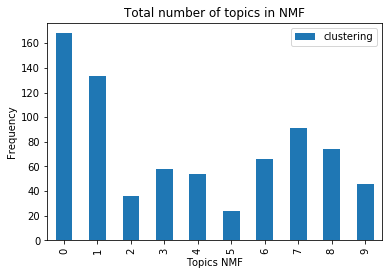

In [264]:
topic_nmf.plot(kind='bar')
plt.xlabel('Topics NMF')
plt.ylabel('Frequency')
plt.title("Total number of topics in NMF")
plt.show()

In [265]:
topic_lsa = df_sub.groupby('Topic_LSA')[['clustering']].count()
topic_lsa = topic_lsa.sort_values(["Topic_LSA"], ascending = True)
topic_lsa

,clustering
Topic_LSA,
0,340
1,86
2,12
3,57
4,42
5,2
6,85
7,36
8,57


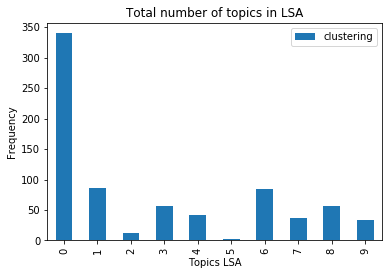

In [266]:
topic_lsa.plot(kind='bar')
plt.xlabel('Topics LSA')
plt.ylabel('Frequency')
plt.title("Total number of topics in LSA")
plt.show()

In [267]:
# distribuzione topic by cluster

In [268]:
# fare tanti ist cluster-topic

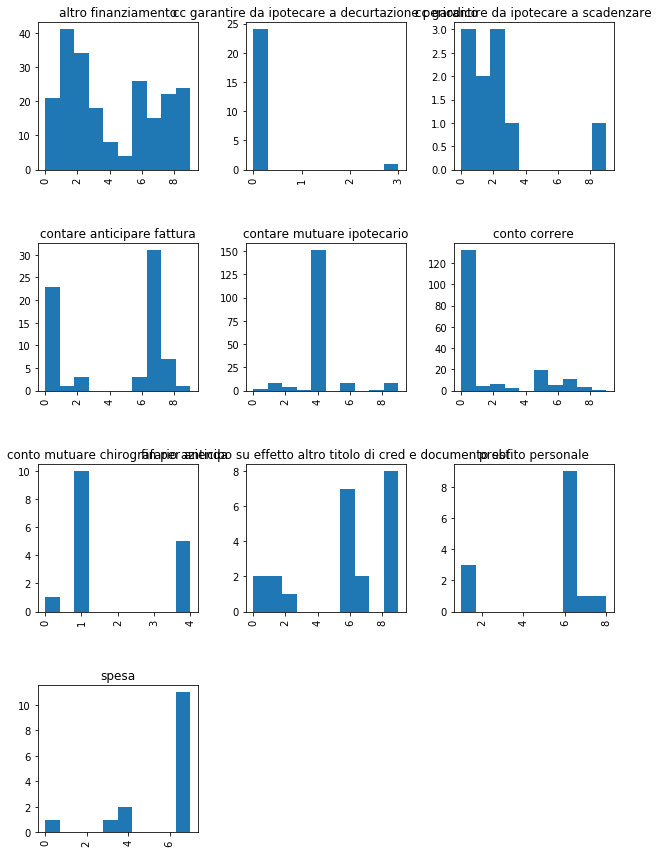

In [269]:
df_sub['Topic_LDA'].hist(by=df_sub['clustering'], figsize = (10,15))
plt.show()
# good for cluster 2,5,6,10
# bad for cluster 1,3,4,7,8,9

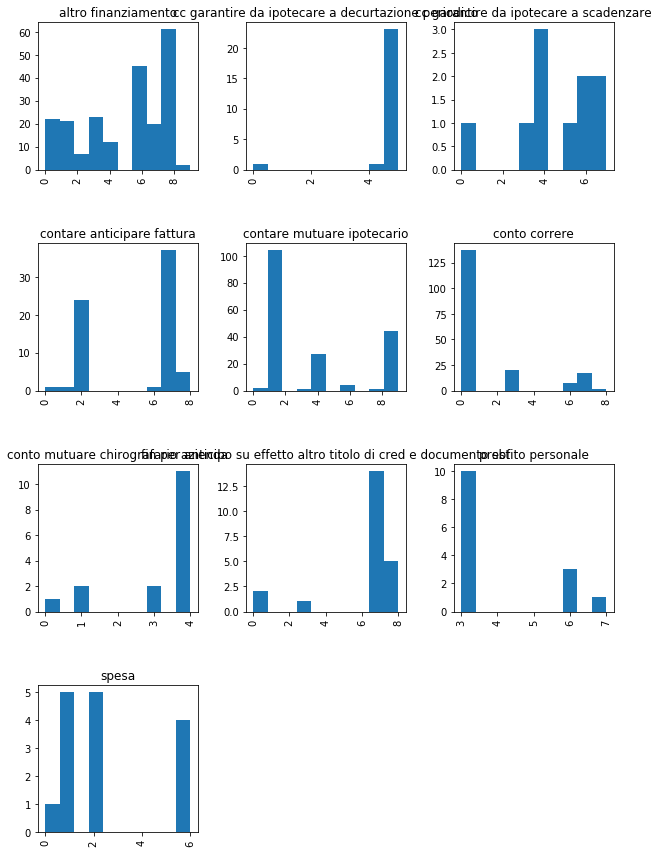

In [270]:
df_sub['Topic_NMF'].hist(by=df_sub['clustering'], figsize = (10,15))
plt.show()
# good for cluster 2,6,7,8,9
# bad for cluster 1,3,4,5,10

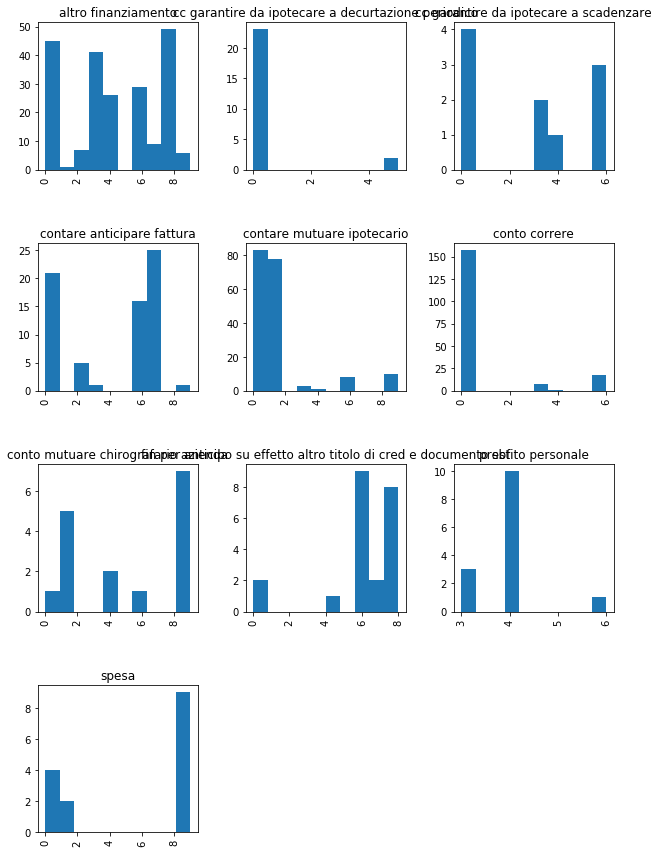

In [271]:
df_sub['Topic_LSA'].hist(by=df_sub['clustering'], figsize = (10,15))
plt.show()
# good for cluster 2,6,10
# bad for cluster 1,3,4,5,7,8,9

# 3. Machine learning models:

Sviluppo di un classificatore che sulla base dei termini del documento di input de sulla base del topic\cluster di afferenza del documento, lo classifichi nel gruppo di afferenza più plausibile e stima delle probabilità di appartenenza ai diversi cluster. (potresti usare tecniche di supervised learning come random forests, grandient boosting, neural network ecc..)

In [272]:
df = df_new[['clustering','LOAN_TYPE']]

In [273]:
cluster_per_loans = df.groupby('clustering')[['LOAN_TYPE']].count()
cluster_per_loans = cluster_per_loans.sort_values(["LOAN_TYPE"], ascending = False)
cluster_per_loans

,LOAN_TYPE
clustering,
altro finanziamento,213
contare mutuare ipotecario,183
conto correre,183
contare anticipare fattura,69
cc garantire da ipotecare a decurtazione periodico,25
fin per anticipo su effetto altro titolo di cred e documento sbf,22
conto mutuare chirografario azienda,16
spesa,15
prestito personale,14


In [274]:
# There are 3 groups with only 1 observation. 
# It is better to not consider them in the machine learning models,
# but only to assign the specific record to its cluster in the end.

# Therefore, I remove the clusters with only 1 observation:

df_ml = df.groupby('clustering').filter(lambda x: x.shape[0] > 1)

In [275]:
df_ml.shape

(764, 2)

In [276]:
cluster_per_loans = df_ml.groupby('clustering')[['LOAN_TYPE']].count()
cluster_per_loans = cluster_per_loans.sort_values(["LOAN_TYPE"], ascending = False)
cluster_per_loans

,LOAN_TYPE
clustering,
altro finanziamento,213
contare mutuare ipotecario,183
conto correre,183
contare anticipare fattura,69
cc garantire da ipotecare a decurtazione periodico,25
fin per anticipo su effetto altro titolo di cred e documento sbf,22
conto mutuare chirografario azienda,16
spesa,15
prestito personale,14


In [277]:
# Check for the existence of NaN values in a cell:
df_ml.isnull().sum()

clustering    0
LOAN_TYPE     0
dtype: int64

In [278]:
blanks = []  # start with an empty list

# (index,clustering,LOAN_TYPE)
for index,clustering,LOAN_TYPE in df_ml.itertuples():  # iterate over the DataFrame
    if type(LOAN_TYPE)==str:            # avoid NaN values
        if LOAN_TYPE.isspace():         # test LOAN_TYPE for whitespace
            blanks.append(index)     # add matching index numbers to the list
        
blanks

[]

In [279]:
df_ml.shape

(764, 2)

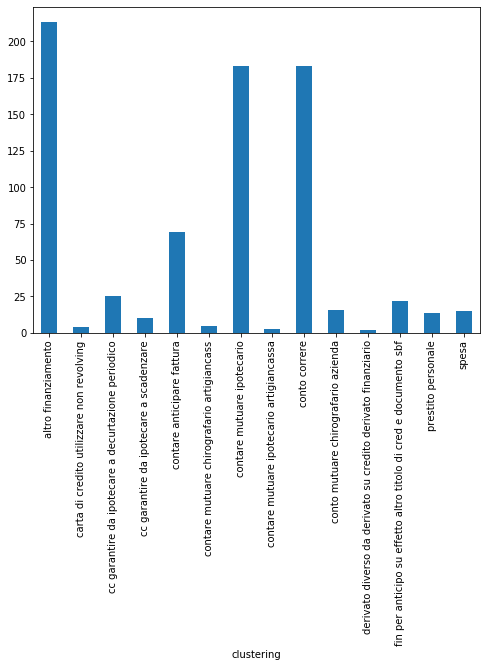

In [280]:
# Imbalanced Classes

fig = plt.figure(figsize=(8,6))
df_ml.groupby('clustering').LOAN_TYPE.count().plot.bar(ylim=0)
plt.show()

In [281]:
tfidf = TfidfVectorizer(max_df=0.95, min_df=2)

**Split the data into train & test sets:**

In [282]:
from sklearn.model_selection import train_test_split

X = df_ml['LOAN_TYPE']
y = df_ml['clustering']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print('Training Data Shape:', X_train.shape)
print('Testing Data Shape: ', X_test.shape)

Training Data Shape: (511,)
Testing Data Shape:  (253,)


**Build pipelines to vectorize the data, then train and fit a model**

Now that we have sets to train and test, we'll develop a selection of pipelines, each with a different model.

In [283]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics # for confusion matrix

## 3.1 Logistic regression:

In [284]:
# Build pipelines to vectorize the data, then train and fit a model

In [285]:
from sklearn.linear_model import LogisticRegression

In [286]:
# Logistic Regression:
text_clf_logreg = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf1', LogisticRegression()),
])

**Feed the training data through the first pipeline**

In [287]:
text_clf_logreg.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf1',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scalin

In [288]:
# Form a prediction set
predictions_lr = text_clf_logreg.predict(X_test)

In [289]:
# Print a classification report
print(metrics.classification_report(y_test,predictions_lr))

                                                                  precision    recall  f1-score   support

                                             altro finanziamento       0.73      0.92      0.82        75
                       carta di credito utilizzare non revolving       0.00      0.00      0.00         1
              cc garantire da ipotecare a decurtazione periodico       1.00      0.78      0.88         9
                          cc garantire da ipotecare a scadenzare       0.00      0.00      0.00         3
                                      contare anticipare fattura       0.81      0.74      0.77        23
                      contare mutuare chirografario artigiancass       0.00      0.00      0.00         1
                                      contare mutuare ipotecario       0.89      1.00      0.94        56
                        contare mutuare ipotecario artigiancassa       0.00      0.00      0.00         1
                                             

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [290]:
# Print the overall accuracy
accuracy_lr = metrics.accuracy_score(y_test,predictions_lr)
print(accuracy_lr)

0.8458498023715415


## 3.2 Random forest:

In [291]:
# Build pipelines to vectorize the data, then train and fit a model

In [292]:
from sklearn.ensemble import RandomForestClassifier

In [293]:
# Random Forest:
text_clf_ranfor = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf2', RandomForestClassifier()),
])

In [294]:
# Feed the training data through the first pipeline

In [295]:
text_clf_ranfor.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                               

In [296]:
# Form a prediction set
predictions_rf = text_clf_ranfor.predict(X_test)

In [297]:
# Print a classification report
print(metrics.classification_report(y_test,predictions_rf))

                                                                  precision    recall  f1-score   support

                                             altro finanziamento       0.88      0.93      0.90        75
                       carta di credito utilizzare non revolving       1.00      1.00      1.00         1
              cc garantire da ipotecare a decurtazione periodico       1.00      0.78      0.88         9
                          cc garantire da ipotecare a scadenzare       0.50      0.33      0.40         3
                                      contare anticipare fattura       0.91      0.91      0.91        23
                      contare mutuare chirografario artigiancass       0.00      0.00      0.00         1
                                      contare mutuare ipotecario       0.97      1.00      0.98        56
                        contare mutuare ipotecario artigiancassa       0.00      0.00      0.00         1
                                             

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [298]:
# Print the overall accuracy
accuracy_rf = metrics.accuracy_score(y_test,predictions_rf)
print(accuracy_rf)

0.9130434782608695


## 3.3 Naïve Bayes:

In [299]:
# Build pipelines to vectorize the data, then train and fit a model

In [300]:
from sklearn.naive_bayes import MultinomialNB

In [301]:
# Naïve Bayes:
text_clf_nb = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf3', MultinomialNB()),
])

In [302]:
# capire bene pipeline

In [303]:
# passaggi pipeline. 

Machine learning algorithms operate on a numeric feature space, expecting input as a two-dimensional array where rows are instances and columns are features. In order to perform machine learning on text, we need to transform our documents into vector representations such that we can apply numeric machine learning. This process is called feature extraction or more simply, vectorization, and is an essential first step toward language-aware analysis.

In few cases, however, is the vectorization of text into numerical values as simple as applying tf-idf to the raw data. Often, the relevant text to be converted needs to be extracted first. Also, the tf-idf transformation will usually result in matrices too large to be used with certain machine learning algorithms. Hence dimensionality reduction techniques are often applied too. Manually implementing these steps everytime text needs to be transformed quickly becomes repetitive and tedious. It needs to be done for the training as well as test set. Ideally, when using cross-validation to assess one’s model, the transformation needs to be applied separately in each fold, particularly when feature selection (dimensionality reduction) is involved. If care is not taken, information about the whole dataset otherwise leaks into supposedly independent evaluations of individual folds.

In [304]:
# frequenza parola nel testo 
# o metrica standardizzata 

**Feed the training data through the first pipeline**

We'll run naïve Bayes first

In [305]:
text_clf_nb.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf3',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

**Run predictions and analyze the results (naïve Bayes)**

In [306]:
# Form a prediction set
predictions_nb = text_clf_nb.predict(X_test)

In [307]:
# Print a classification report
print(metrics.classification_report(y_test,predictions_nb))

                                                                  precision    recall  f1-score   support

                                             altro finanziamento       0.80      0.89      0.84        75
                       carta di credito utilizzare non revolving       0.00      0.00      0.00         1
              cc garantire da ipotecare a decurtazione periodico       0.00      0.00      0.00         9
                          cc garantire da ipotecare a scadenzare       0.00      0.00      0.00         3
                                      contare anticipare fattura       0.81      0.91      0.86        23
                      contare mutuare chirografario artigiancass       0.00      0.00      0.00         1
                                      contare mutuare ipotecario       0.82      1.00      0.90        56
                        contare mutuare ipotecario artigiancassa       0.00      0.00      0.00         1
                                             

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### precision: the number of true positives divided by the number of true positives plus the number of false positives.
### recall: the number of true positives divided by the number of true positives plus the number of false negatives.

In [308]:
# Print the overall accuracy
accuracy_nb = metrics.accuracy_score(y_test,predictions_nb)
print(accuracy_nb)

0.8142292490118577


Naïve Bayes gave us better-than-average results at 80.64% for classifying loan types in their clusters based on text alone. 

## 3.4 Linear SVC: (Support Vector Classification)

In [309]:
# Build pipelines to vectorize the data, then train and fit a model

In [310]:
from sklearn.svm import LinearSVC

In [311]:
# Linear SVC:
text_clf_lsvc = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf4', LinearSVC()),
])

**Next we'll run Linear SVC.**

In [312]:
text_clf_lsvc.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf4',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
              

**Run predictions and analyze the results (Linear SVC)**

In [313]:
# Form a prediction set
predictions_lsvc = text_clf_lsvc.predict(X_test)

In [314]:
# Print a classification report
print(metrics.classification_report(y_test,predictions_lsvc))

                                                                  precision    recall  f1-score   support

                                             altro finanziamento       0.89      0.93      0.91        75
                       carta di credito utilizzare non revolving       1.00      1.00      1.00         1
              cc garantire da ipotecare a decurtazione periodico       1.00      0.78      0.88         9
                          cc garantire da ipotecare a scadenzare       0.33      0.33      0.33         3
                                      contare anticipare fattura       0.87      0.87      0.87        23
                      contare mutuare chirografario artigiancass       0.00      0.00      0.00         1
                                      contare mutuare ipotecario       0.97      1.00      0.98        56
                        contare mutuare ipotecario artigiancassa       0.00      0.00      0.00         1
                                             

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [315]:
# Print the overall accuracy
accuracy_lsvc = metrics.accuracy_score(y_test,predictions_lsvc)
print(accuracy_lsvc)

0.9130434782608695


Very good! Based on text alone we correctly classified loan types in the correct topic 92.74% of the time.

## 3.5 Gradient boosting:

In [316]:
# Build pipelines to vectorize the data, then train and fit a model

In [317]:
from sklearn.ensemble import GradientBoostingClassifier

In [318]:
# Gradient Boosting:
text_clf_gboost = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf5', GradientBoostingClassifier()),
])

In [319]:
# Feed the training data through the first pipeline

In [320]:
text_clf_gboost.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                                            learning_rate=0.1, loss='deviance',
                                            max_depth=3, max_features=None,
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
          

In [321]:
# Form a prediction set
predictions_gb = text_clf_gboost.predict(X_test)

In [322]:
# Print a classification report
print(metrics.classification_report(y_test,predictions_gb))

                                                                  precision    recall  f1-score   support

                                             altro finanziamento       0.89      0.88      0.89        75
                       carta di credito utilizzare non revolving       1.00      1.00      1.00         1
              cc garantire da ipotecare a decurtazione periodico       1.00      0.78      0.88         9
                          cc garantire da ipotecare a scadenzare       0.00      0.00      0.00         3
                                      contare anticipare fattura       0.83      0.87      0.85        23
                      contare mutuare chirografario artigiancass       0.00      0.00      0.00         1
                                      contare mutuare ipotecario       0.96      0.93      0.95        56
                        contare mutuare ipotecario artigiancassa       0.00      0.00      0.00         1
                                             

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [323]:
# Print the overall accuracy
accuracy_gb = metrics.accuracy_score(y_test,predictions_gb)
print(accuracy_gb)

0.8853754940711462


## 3.6 Neural Network:

In [324]:
from sklearn.neural_network import MLPClassifier

In [325]:
# Neural Network:
text_clf_nn = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf6', MLPClassifier()),
])

In [326]:
# Feed the training data through the first pipeline
text_clf_nn.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                               batch_size='auto', beta_1=0.9, beta_2=0.999,
                               early_stopping=False, epsilon=1e-08,
                               hidden_layer_sizes=(100,),
                               learning_rate='constant',
                               learning_rat

In [327]:
# Form a prediction set
predictions_nn = text_clf_nn.predict(X_test)

In [328]:
# Print a classification report
print(metrics.classification_report(y_test,predictions_nn))

                                                                  precision    recall  f1-score   support

                                             altro finanziamento       0.84      0.85      0.85        75
                       carta di credito utilizzare non revolving       1.00      1.00      1.00         1
              cc garantire da ipotecare a decurtazione periodico       1.00      0.78      0.88         9
                          cc garantire da ipotecare a scadenzare       0.33      0.33      0.33         3
                                      contare anticipare fattura       0.88      0.91      0.89        23
                      contare mutuare chirografario artigiancass       0.00      0.00      0.00         1
                                      contare mutuare ipotecario       0.91      0.95      0.93        56
                        contare mutuare ipotecario artigiancassa       0.00      0.00      0.00         1
                                             

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [329]:
# Print the overall accuracy
accuracy_nn = metrics.accuracy_score(y_test,predictions_nn)
print(accuracy_nn)

0.8735177865612648


# 4. Analisi dei risultati ed insight

## 1. Confusion matrix:

In [330]:
# Logistic Regression confusion matrix:
print(metrics.confusion_matrix(y_test,predictions_lr))

[[69  0  0  0  1  0  4  0  0  1  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  7  0  0  0  0  0  1  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [ 6  0  0  0 17  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 56  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0 59  0  0  0  0  0]
 [ 1  0  0  0  0  0  1  0  0  3  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 8  0  0  0  3  0  0  0  0  0  0  0  0  0]
 [ 3  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  0  3]]


In [331]:
# Random Forest confusion matrix:
print(metrics.confusion_matrix(y_test,predictions_rf))

[[70  0  0  0  1  0  2  0  0  0  0  0  2  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  7  1  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  2  0  0  0  0  0]
 [ 1  0  0  0 21  0  0  0  1  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 56  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 60  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  4  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 4  0  0  0  1  0  0  0  0  0  0  6  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  4]]


In [332]:
# Naive Bayes Classifier confusion matrix:
print(metrics.confusion_matrix(y_test,predictions_nb))

[[67  0  0  0  1  0  7  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  9  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  2  0  0  0  0  0]
 [ 1  0  0  0 21  0  0  0  1  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 56  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 60  0  0  0  0  0]
 [ 1  0  0  0  0  0  3  0  1  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 7  0  0  0  4  0  0  0  0  0  0  0  0  0]
 [ 3  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  1  0  0  0  0  0  0  2]]


In [333]:
# Linear Support Vector Classifier confusion matrix:
print(metrics.confusion_matrix(y_test,predictions_lsvc))

[[70  0  0  0  1  0  2  0  0  1  0  0  1  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  7  2  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  2  0  0  0  0  0]
 [ 2  0  0  0 20  0  0  0  1  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 56  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 60  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  4  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  2  0  0  0  0  0  0  8  0  0]
 [ 3  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  4]]


In [334]:
# Gradient Boosting confusion matrix:
print(metrics.confusion_matrix(y_test,predictions_gb))

[[66  0  0  0  3  1  2  0  0  2  0  0  1  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  7  2  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  3  0  0  0  0  0]
 [ 2  0  0  0 20  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0  0]
 [ 1  0  0  3  0  0 52  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0 59  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  4  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0 10  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  4]]


In [335]:
# Neural Network confusion matrix:
print(metrics.confusion_matrix(y_test,predictions_nn))

[[64  0  0  0  1  2  5  0  1  1  0  0  1  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  7  2  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  2  0  0  0  0  0]
 [ 1  0  0  0 21  0  0  0  1  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0 53  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 60  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  4  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 4  0  0  0  2  0  0  0  0  0  0  5  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  4]]


## 2. Confusion matrix with labels:

In [336]:
# Logistic Regression confusion matrix with labels:
pd.DataFrame(metrics.confusion_matrix(y_test,predictions_lr), index=['altro finaziamento','carta di credito utilizzare non revolving','cc garantire da ipotecare a decurtazione periodico','cc garantire da ipotecare a scadenzare','contare anticipare fattura','contare mutuare chirografario artigiancass','contare mutuare ipotecario','contare mutuare ipotecario artigiancassa','conto correre','conto mutuare chirografario azienda','derivato diverso da derivato su credito derivato finanziario','fin per anticipo su effetto altro titolo di cred e documento sbf','prestito personale','spesa'], columns=['altro finaziamento','carta di credito utilizzare non revolving','cc garantire da ipotecare a decurtazione periodico','cc garantire da ipotecare a scadenzare','contare anticipare fattura','contare mutuare chirografario artigiancass','contare mutuare ipotecario','contare mutuare ipotecario artigiancassa','conto correre','conto mutuare chirografario azienda','derivato diverso da derivato su credito derivato finanziario','fin per anticipo su effetto altro titolo di cred e documento sbf','prestito personale','spesa'])

,altro finaziamento,carta di credito utilizzare non revolving,cc garantire da ipotecare a decurtazione periodico,cc garantire da ipotecare a scadenzare,contare anticipare fattura,contare mutuare chirografario artigiancass,contare mutuare ipotecario,contare mutuare ipotecario artigiancassa,conto correre,conto mutuare chirografario azienda,derivato diverso da derivato su credito derivato finanziario,fin per anticipo su effetto altro titolo di cred e documento sbf,prestito personale,spesa
altro finaziamento,69,0,0,0,1,0,4,0,0,1,0,0,0,0
carta di credito utilizzare non revolving,1,0,0,0,0,0,0,0,0,0,0,0,0,0
cc garantire da ipotecare a decurtazione periodico,1,0,7,0,0,0,0,0,1,0,0,0,0,0
cc garantire da ipotecare a scadenzare,2,0,0,0,0,0,0,0,1,0,0,0,0,0
contare anticipare fattura,6,0,0,0,17,0,0,0,0,0,0,0,0,0
contare mutuare chirografario artigiancass,1,0,0,0,0,0,0,0,0,0,0,0,0,0
contare mutuare ipotecario,0,0,0,0,0,0,56,0,0,0,0,0,0,0
contare mutuare ipotecario artigiancassa,0,0,0,0,0,0,1,0,0,0,0,0,0,0
conto correre,1,0,0,0,0,0,0,0,59,0,0,0,0,0
conto mutuare chirografario azienda,1,0,0,0,0,0,1,0,0,3,0,0,0,0


In [337]:
# Random Forest confusion matrix with labels:
pd.DataFrame(metrics.confusion_matrix(y_test,predictions_rf), index=['altro finaziamento','carta di credito utilizzare non revolving','cc garantire da ipotecare a decurtazione periodico','cc garantire da ipotecare a scadenzare','contare anticipare fattura','contare mutuare chirografario artigiancass','contare mutuare ipotecario','contare mutuare ipotecario artigiancassa','conto correre','conto mutuare chirografario azienda','derivato diverso da derivato su credito derivato finanziario','fin per anticipo su effetto altro titolo di cred e documento sbf','prestito personale','spesa'], columns=['altro finaziamento','carta di credito utilizzare non revolving','cc garantire da ipotecare a decurtazione periodico','cc garantire da ipotecare a scadenzare','contare anticipare fattura','contare mutuare chirografario artigiancass','contare mutuare ipotecario','contare mutuare ipotecario artigiancassa','conto correre','conto mutuare chirografario azienda','derivato diverso da derivato su credito derivato finanziario','fin per anticipo su effetto altro titolo di cred e documento sbf','prestito personale','spesa'])

,altro finaziamento,carta di credito utilizzare non revolving,cc garantire da ipotecare a decurtazione periodico,cc garantire da ipotecare a scadenzare,contare anticipare fattura,contare mutuare chirografario artigiancass,contare mutuare ipotecario,contare mutuare ipotecario artigiancassa,conto correre,conto mutuare chirografario azienda,derivato diverso da derivato su credito derivato finanziario,fin per anticipo su effetto altro titolo di cred e documento sbf,prestito personale,spesa
altro finaziamento,70,0,0,0,1,0,2,0,0,0,0,0,2,0
carta di credito utilizzare non revolving,0,1,0,0,0,0,0,0,0,0,0,0,0,0
cc garantire da ipotecare a decurtazione periodico,0,0,7,1,0,0,0,0,1,0,0,0,0,0
cc garantire da ipotecare a scadenzare,0,0,0,1,0,0,0,0,2,0,0,0,0,0
contare anticipare fattura,1,0,0,0,21,0,0,0,1,0,0,0,0,0
contare mutuare chirografario artigiancass,1,0,0,0,0,0,0,0,0,0,0,0,0,0
contare mutuare ipotecario,0,0,0,0,0,0,56,0,0,0,0,0,0,0
contare mutuare ipotecario artigiancassa,0,0,0,0,0,1,0,0,0,0,0,0,0,0
conto correre,0,0,0,0,0,0,0,0,60,0,0,0,0,0
conto mutuare chirografario azienda,1,0,0,0,0,0,0,0,0,4,0,0,0,0


In [338]:
# Naive Bayes Classifier confusion matrix with labels:
pd.DataFrame(metrics.confusion_matrix(y_test,predictions_nb), index=['altro finaziamento','carta di credito utilizzare non revolving','cc garantire da ipotecare a decurtazione periodico','cc garantire da ipotecare a scadenzare','contare anticipare fattura','contare mutuare chirografario artigiancass','contare mutuare ipotecario','contare mutuare ipotecario artigiancassa','conto correre','conto mutuare chirografario azienda','derivato diverso da derivato su credito derivato finanziario','fin per anticipo su effetto altro titolo di cred e documento sbf','prestito personale','spesa'], columns=['altro finaziamento','carta di credito utilizzare non revolving','cc garantire da ipotecare a decurtazione periodico','cc garantire da ipotecare a scadenzare','contare anticipare fattura','contare mutuare chirografario artigiancass','contare mutuare ipotecario','contare mutuare ipotecario artigiancassa','conto correre','conto mutuare chirografario azienda','derivato diverso da derivato su credito derivato finanziario','fin per anticipo su effetto altro titolo di cred e documento sbf','prestito personale','spesa'])

,altro finaziamento,carta di credito utilizzare non revolving,cc garantire da ipotecare a decurtazione periodico,cc garantire da ipotecare a scadenzare,contare anticipare fattura,contare mutuare chirografario artigiancass,contare mutuare ipotecario,contare mutuare ipotecario artigiancassa,conto correre,conto mutuare chirografario azienda,derivato diverso da derivato su credito derivato finanziario,fin per anticipo su effetto altro titolo di cred e documento sbf,prestito personale,spesa
altro finaziamento,67,0,0,0,1,0,7,0,0,0,0,0,0,0
carta di credito utilizzare non revolving,1,0,0,0,0,0,0,0,0,0,0,0,0,0
cc garantire da ipotecare a decurtazione periodico,0,0,0,0,0,0,0,0,9,0,0,0,0,0
cc garantire da ipotecare a scadenzare,1,0,0,0,0,0,0,0,2,0,0,0,0,0
contare anticipare fattura,1,0,0,0,21,0,0,0,1,0,0,0,0,0
contare mutuare chirografario artigiancass,1,0,0,0,0,0,0,0,0,0,0,0,0,0
contare mutuare ipotecario,0,0,0,0,0,0,56,0,0,0,0,0,0,0
contare mutuare ipotecario artigiancassa,0,0,0,0,0,0,1,0,0,0,0,0,0,0
conto correre,0,0,0,0,0,0,0,0,60,0,0,0,0,0
conto mutuare chirografario azienda,1,0,0,0,0,0,3,0,1,0,0,0,0,0


In [339]:
# Linear Support Vector Classifier confusion matrix with labels:

pd.DataFrame(metrics.confusion_matrix(y_test,predictions_lsvc), index=['altro finaziamento','carta di credito utilizzare non revolving','cc garantire da ipotecare a decurtazione periodico','cc garantire da ipotecare a scadenzare','contare anticipare fattura','contare mutuare chirografario artigiancass','contare mutuare ipotecario','contare mutuare ipotecario artigiancassa','conto correre','conto mutuare chirografario azienda','derivato diverso da derivato su credito derivato finanziario','fin per anticipo su effetto altro titolo di cred e documento sbf','prestito personale','spesa'], columns=['altro finaziamento','carta di credito utilizzare non revolving','cc garantire da ipotecare a decurtazione periodico','cc garantire da ipotecare a scadenzare','contare anticipare fattura','contare mutuare chirografario artigiancass','contare mutuare ipotecario','contare mutuare ipotecario artigiancassa','conto correre','conto mutuare chirografario azienda','derivato diverso da derivato su credito derivato finanziario','fin per anticipo su effetto altro titolo di cred e documento sbf','prestito personale','spesa'])

,altro finaziamento,carta di credito utilizzare non revolving,cc garantire da ipotecare a decurtazione periodico,cc garantire da ipotecare a scadenzare,contare anticipare fattura,contare mutuare chirografario artigiancass,contare mutuare ipotecario,contare mutuare ipotecario artigiancassa,conto correre,conto mutuare chirografario azienda,derivato diverso da derivato su credito derivato finanziario,fin per anticipo su effetto altro titolo di cred e documento sbf,prestito personale,spesa
altro finaziamento,70,0,0,0,1,0,2,0,0,1,0,0,1,0
carta di credito utilizzare non revolving,0,1,0,0,0,0,0,0,0,0,0,0,0,0
cc garantire da ipotecare a decurtazione periodico,0,0,7,2,0,0,0,0,0,0,0,0,0,0
cc garantire da ipotecare a scadenzare,0,0,0,1,0,0,0,0,2,0,0,0,0,0
contare anticipare fattura,2,0,0,0,20,0,0,0,1,0,0,0,0,0
contare mutuare chirografario artigiancass,1,0,0,0,0,0,0,0,0,0,0,0,0,0
contare mutuare ipotecario,0,0,0,0,0,0,56,0,0,0,0,0,0,0
contare mutuare ipotecario artigiancassa,0,0,0,0,0,1,0,0,0,0,0,0,0,0
conto correre,0,0,0,0,0,0,0,0,60,0,0,0,0,0
conto mutuare chirografario azienda,1,0,0,0,0,0,0,0,0,4,0,0,0,0


In [340]:
# Gradient Boosting confusion matrix with labels:

pd.DataFrame(metrics.confusion_matrix(y_test,predictions_gb), index=['altro finaziamento','carta di credito utilizzare non revolving','cc garantire da ipotecare a decurtazione periodico','cc garantire da ipotecare a scadenzare','contare anticipare fattura','contare mutuare chirografario artigiancass','contare mutuare ipotecario','contare mutuare ipotecario artigiancassa','conto correre','conto mutuare chirografario azienda','derivato diverso da derivato su credito derivato finanziario','fin per anticipo su effetto altro titolo di cred e documento sbf','prestito personale','spesa'], columns=['altro finaziamento','carta di credito utilizzare non revolving','cc garantire da ipotecare a decurtazione periodico','cc garantire da ipotecare a scadenzare','contare anticipare fattura','contare mutuare chirografario artigiancass','contare mutuare ipotecario','contare mutuare ipotecario artigiancassa','conto correre','conto mutuare chirografario azienda','derivato diverso da derivato su credito derivato finanziario','fin per anticipo su effetto altro titolo di cred e documento sbf','prestito personale','spesa'])

,altro finaziamento,carta di credito utilizzare non revolving,cc garantire da ipotecare a decurtazione periodico,cc garantire da ipotecare a scadenzare,contare anticipare fattura,contare mutuare chirografario artigiancass,contare mutuare ipotecario,contare mutuare ipotecario artigiancassa,conto correre,conto mutuare chirografario azienda,derivato diverso da derivato su credito derivato finanziario,fin per anticipo su effetto altro titolo di cred e documento sbf,prestito personale,spesa
altro finaziamento,66,0,0,0,3,1,2,0,0,2,0,0,1,0
carta di credito utilizzare non revolving,0,1,0,0,0,0,0,0,0,0,0,0,0,0
cc garantire da ipotecare a decurtazione periodico,0,0,7,2,0,0,0,0,0,0,0,0,0,0
cc garantire da ipotecare a scadenzare,0,0,0,0,0,0,0,0,3,0,0,0,0,0
contare anticipare fattura,2,0,0,0,20,0,0,0,1,0,0,0,0,0
contare mutuare chirografario artigiancass,0,0,0,0,0,0,0,1,0,0,0,0,0,0
contare mutuare ipotecario,1,0,0,3,0,0,52,0,0,0,0,0,0,0
contare mutuare ipotecario artigiancassa,0,0,0,0,0,1,0,0,0,0,0,0,0,0
conto correre,0,0,0,0,1,0,0,0,59,0,0,0,0,0
conto mutuare chirografario azienda,1,0,0,0,0,0,0,0,0,4,0,0,0,0


In [341]:
# Neural Network confusion matrix with labels:

pd.DataFrame(metrics.confusion_matrix(y_test,predictions_nn), index=['altro finaziamento','carta di credito utilizzare non revolving','cc garantire da ipotecare a decurtazione periodico','cc garantire da ipotecare a scadenzare','contare anticipare fattura','contare mutuare chirografario artigiancass','contare mutuare ipotecario','contare mutuare ipotecario artigiancassa','conto correre','conto mutuare chirografario azienda','derivato diverso da derivato su credito derivato finanziario','fin per anticipo su effetto altro titolo di cred e documento sbf','prestito personale','spesa'], columns=['altro finaziamento','carta di credito utilizzare non revolving','cc garantire da ipotecare a decurtazione periodico','cc garantire da ipotecare a scadenzare','contare anticipare fattura','contare mutuare chirografario artigiancass','contare mutuare ipotecario','contare mutuare ipotecario artigiancassa','conto correre','conto mutuare chirografario azienda','derivato diverso da derivato su credito derivato finanziario','fin per anticipo su effetto altro titolo di cred e documento sbf','prestito personale','spesa'])

,altro finaziamento,carta di credito utilizzare non revolving,cc garantire da ipotecare a decurtazione periodico,cc garantire da ipotecare a scadenzare,contare anticipare fattura,contare mutuare chirografario artigiancass,contare mutuare ipotecario,contare mutuare ipotecario artigiancassa,conto correre,conto mutuare chirografario azienda,derivato diverso da derivato su credito derivato finanziario,fin per anticipo su effetto altro titolo di cred e documento sbf,prestito personale,spesa
altro finaziamento,64,0,0,0,1,2,5,0,1,1,0,0,1,0
carta di credito utilizzare non revolving,0,1,0,0,0,0,0,0,0,0,0,0,0,0
cc garantire da ipotecare a decurtazione periodico,0,0,7,2,0,0,0,0,0,0,0,0,0,0
cc garantire da ipotecare a scadenzare,0,0,0,1,0,0,0,0,2,0,0,0,0,0
contare anticipare fattura,1,0,0,0,21,0,0,0,1,0,0,0,0,0
contare mutuare chirografario artigiancass,1,0,0,0,0,0,0,0,0,0,0,0,0,0
contare mutuare ipotecario,2,0,0,0,0,0,53,0,1,0,0,0,0,0
contare mutuare ipotecario artigiancassa,0,0,0,0,0,1,0,0,0,0,0,0,0,0
conto correre,0,0,0,0,0,0,0,0,60,0,0,0,0,0
conto mutuare chirografario azienda,1,0,0,0,0,0,0,0,0,4,0,0,0,0


## 3. Accuracy: 
It is the percentage of correctly classified records on the total.

In [342]:
pd.DataFrame({'Accuracy': [accuracy_lr, accuracy_rf, accuracy_nb, accuracy_lsvc, accuracy_gb, accuracy_nn]},
              index=['Logistic Regression', 'Random Forest', 'Naïve Bayes Classifier', 'Linear Support Vector Classifier (SVC)','Gradient Boosting', 'Neural Network'])

,Accuracy
Logistic Regression,0.845850
Random Forest,0.913043
Naïve Bayes Classifier,0.814229
Linear Support Vector Classifier (SVC),0.913043
Gradient Boosting,0.885375
Neural Network,0.873518


**Linear Support Vector Classifier(SVC) and Gradient Boosting are the best models.**

## 4. Precision, Recall, F1-score:

1. Precision is defined as the number of true positives divided by the number of true positives plus the number of false positives.
2. The precise definition of recall is the number of true positives divided by the number of true positives plus the number of false negatives.
3. In cases where we want to find an optimal blend of precision and recall we can combine the two metrics using what is called the F1 score.
• The F1 score is the harmonic mean of precision and recall taking both metrics into account.

In [343]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [344]:
#weighted':
#Calculate metrics for each label, 
#and find their average weighted by support (the number of true instances for each label). 
# This alters ‘macro’ to account for label imbalance; 
# it can result in an F-score that is not between precision and recall.

precision_lr = metrics.precision_score(y_test,predictions_lr, average='weighted')
recall_lr = metrics.recall_score(y_test,predictions_lr, average='weighted')
f1_score_lr = metrics.f1_score(y_test,predictions_lr, average='weighted')

precision_rf = metrics.precision_score(y_test,predictions_rf, average='weighted')
recall_rf = metrics.recall_score(y_test,predictions_rf, average='weighted')
f1_score_rf = metrics.f1_score(y_test,predictions_rf, average='weighted')

precision_nb = metrics.precision_score(y_test,predictions_nb, average='weighted')
recall_nb = metrics.recall_score(y_test,predictions_nb, average='weighted')
f1_score_nb = metrics.f1_score(y_test,predictions_nb, average='weighted')

precision_lsvc = metrics.precision_score(y_test,predictions_lsvc, average='weighted')
recall_lsvc = metrics.recall_score(y_test,predictions_lsvc, average='weighted')
f1_score_lsvc = metrics.f1_score(y_test,predictions_lsvc, average='weighted')

precision_gb = metrics.precision_score(y_test,predictions_gb, average='weighted')
recall_gb = metrics.recall_score(y_test,predictions_gb, average='weighted')
f1_score_gb = metrics.f1_score(y_test,predictions_gb, average='weighted')

precision_nn = metrics.precision_score(y_test,predictions_nn, average='weighted')
recall_nn = metrics.recall_score(y_test,predictions_nn, average='weighted')
f1_score_nn = metrics.f1_score(y_test,predictions_nn, average='weighted')

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [345]:
pd.DataFrame({'Precision': [precision_lr, precision_rf, precision_nb, precision_lsvc, precision_gb, precision_nn],
              'Recall': [recall_lr, recall_rf, recall_nb, recall_lsvc, recall_gb, recall_nn],
              'F1 score': [f1_score_lr, f1_score_rf, f1_score_nb, f1_score_lsvc, f1_score_gb, f1_score_nn]},
             index=['Logistic Regression', 'Random Forest', 'Naïve Bayes Classifier', 'Linear Support Vector Classifier (SVC)','Gradient Boosting', 'Neural Network'])

,Precision,Recall,F1 score
Logistic Regression,0.783529,0.845850,0.809765
Random Forest,0.906893,0.913043,0.905566
Naïve Bayes Classifier,0.702890,0.814229,0.752192
Linear Support Vector Classifier (SVC),0.899872,0.913043,0.904641
Gradient Boosting,0.893313,0.885375,0.888187
Neural Network,0.874861,0.873518,0.868575


**Precision e Recall confermano che Linear Support Vector Classifier (SVC) e Gradient Boosting are the best models.**

LSVC and GB are the best models. Let's try to improve them:

## Ensembling models:

Ensemble modeling is a process of creating a model composed by different algorithms in order to gain a better prediction of the outcome, compared to the prediction of a simple stand-alone algorithm. 

It could also be done by using different training data sets.
The ensemble model then aggregates the prediction of each base model and results in one final prediction for the unseen data.

The goal of the ensambling model is to reduce the generalization error of the prediction.

In this particular case I decided to perform an ensembled model with the algorithms I used before, but not using a different train and test splitting. I put together the best models which are  Linear Support Vector Classifier (SVC) and Gradient Boosting.

In [346]:
# put together the models and it will return probability distribution
from sklearn.ensemble import VotingClassifier

Use “VotingClassifier” module:

In [347]:
ensemble = VotingClassifier(estimators=[('lsvc', text_clf_lsvc), ('gb', text_clf_gboost)], voting='hard')

In [348]:
ensemble.fit(X_train, y_train)

VotingClassifier(estimators=[('lsvc',
                              Pipeline(memory=None,
                                       steps=[('tfidf',
                                               TfidfVectorizer(analyzer='word',
                                                               binary=False,
                                                               decode_error='strict',
                                                               dtype=<class 'numpy.float64'>,
                                                               encoding='utf-8',
                                                               input='content',
                                                               lowercase=True,
                                                               max_df=1.0,
                                                               max_features=None,
                                                               min_df=1,
                                               

In [349]:
ensemble.score(X_test,y_test)

0.8932806324110671

In [350]:
# Compute probability prediction:
predictions_ensemble = ensemble.predict(X_test)

In [351]:
# Ensembling models confusion matrix:
print(metrics.confusion_matrix(y_test,predictions_ensemble))

[[70  0  0  0  1  0  2  0  0  1  0  0  1  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  7  2  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  2  0  0  0  0  0]
 [ 2  0  0  0 20  0  0  0  1  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  3  0  0 52  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0 59  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  4  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  2  0  0  0  0  0  0  8  0  0]
 [ 3  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  4]]


In [352]:
#  Ensembling models confusion matrix with labels:

pd.DataFrame(metrics.confusion_matrix(y_test,predictions_ensemble), index=['altro finaziamento','carta di credito utilizzare non revolving','cc garantire da ipotecare a decurtazione periodico','cc garantire da ipotecare a scadenzare','contare anticipare fattura','contare mutuare chirografario artigiancass','contare mutuare ipotecario','contare mutuare ipotecario artigiancassa','conto correre','conto mutuare chirografario azienda','derivato diverso da derivato su credito derivato finanziario','fin per anticipo su effetto altro titolo di cred e documento sbf','prestito personale','spesa'], columns=['altro finaziamento','carta di credito utilizzare non revolving','cc garantire da ipotecare a decurtazione periodico','cc garantire da ipotecare a scadenzare','contare anticipare fattura','contare mutuare chirografario artigiancass','contare mutuare ipotecario','contare mutuare ipotecario artigiancassa','conto correre','conto mutuare chirografario azienda','derivato diverso da derivato su credito derivato finanziario','fin per anticipo su effetto altro titolo di cred e documento sbf','prestito personale','spesa'])

,altro finaziamento,carta di credito utilizzare non revolving,cc garantire da ipotecare a decurtazione periodico,cc garantire da ipotecare a scadenzare,contare anticipare fattura,contare mutuare chirografario artigiancass,contare mutuare ipotecario,contare mutuare ipotecario artigiancassa,conto correre,conto mutuare chirografario azienda,derivato diverso da derivato su credito derivato finanziario,fin per anticipo su effetto altro titolo di cred e documento sbf,prestito personale,spesa
altro finaziamento,70,0,0,0,1,0,2,0,0,1,0,0,1,0
carta di credito utilizzare non revolving,0,1,0,0,0,0,0,0,0,0,0,0,0,0
cc garantire da ipotecare a decurtazione periodico,0,0,7,2,0,0,0,0,0,0,0,0,0,0
cc garantire da ipotecare a scadenzare,0,0,0,1,0,0,0,0,2,0,0,0,0,0
contare anticipare fattura,2,0,0,0,20,0,0,0,1,0,0,0,0,0
contare mutuare chirografario artigiancass,1,0,0,0,0,0,0,0,0,0,0,0,0,0
contare mutuare ipotecario,1,0,0,3,0,0,52,0,0,0,0,0,0,0
contare mutuare ipotecario artigiancassa,0,0,0,0,0,1,0,0,0,0,0,0,0,0
conto correre,0,0,0,0,1,0,0,0,59,0,0,0,0,0
conto mutuare chirografario azienda,1,0,0,0,0,0,0,0,0,4,0,0,0,0


In [353]:
# Print a classification report
print(metrics.classification_report(y_test,predictions_ensemble))

                                                                  precision    recall  f1-score   support

                                             altro finanziamento       0.88      0.93      0.90        75
                       carta di credito utilizzare non revolving       1.00      1.00      1.00         1
              cc garantire da ipotecare a decurtazione periodico       1.00      0.78      0.88         9
                          cc garantire da ipotecare a scadenzare       0.17      0.33      0.22         3
                                      contare anticipare fattura       0.83      0.87      0.85        23
                      contare mutuare chirografario artigiancass       0.00      0.00      0.00         1
                                      contare mutuare ipotecario       0.96      0.93      0.95        56
                        contare mutuare ipotecario artigiancassa       0.00      0.00      0.00         1
                                             

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [354]:
# Print the overall accuracy
accuracy_ensemble = metrics.accuracy_score(y_test,predictions_ensemble)
print(accuracy_ensemble)

0.8932806324110671


In [355]:
precision_ensemble = metrics.precision_score(y_test,predictions_ensemble, average='weighted')
recall_ensemble = metrics.recall_score(y_test,predictions_ensemble, average='weighted')
f1_score_ensemble = metrics.f1_score(y_test,predictions_ensemble, average='weighted')

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [356]:
# Risultati ensemble model:
pd.DataFrame({'Ensemble model': [accuracy_ensemble, precision_ensemble, recall_ensemble, f1_score_ensemble]},
              index=['Accuracy', 'Precision', 'Recall', 'F1 score'])

,Ensemble model
Accuracy,0.893281
Precision,0.890571
Recall,0.893281
F1 score,0.889721


In [357]:
# Risultati tutti i modelli:
pd.DataFrame({'Accuracy': [accuracy_lr, accuracy_rf, accuracy_nb, accuracy_lsvc, accuracy_gb, accuracy_nn, accuracy_ensemble],
             'Precision': [precision_lr, precision_rf, precision_nb, precision_lsvc, precision_gb, precision_nn, precision_ensemble],
             'Recall': [recall_lr, recall_rf, recall_nb, recall_lsvc, recall_gb, recall_nn, recall_ensemble],
             'F1 score': [f1_score_lr, f1_score_rf, f1_score_nb, f1_score_lsvc, f1_score_gb, f1_score_nn, f1_score_ensemble]},
              index=['Logistic Regression', 'Random Forest', 'Naïve Bayes Classifier', 'Linear Support Vector Classifier (SVC)','Gradient Boosting', 'Neural Network','Ensemble model'])

,Accuracy,Precision,Recall,F1 score
Logistic Regression,0.845850,0.783529,0.845850,0.809765
Random Forest,0.913043,0.906893,0.913043,0.905566
Naïve Bayes Classifier,0.814229,0.702890,0.814229,0.752192
Linear Support Vector Classifier (SVC),0.913043,0.899872,0.913043,0.904641
Gradient Boosting,0.885375,0.893313,0.885375,0.888187
Neural Network,0.873518,0.874861,0.873518,0.868575
Ensemble model,0.893281,0.890571,0.893281,0.889721


With the ensemble model I had a little improvement with respect to Gradient Boosting Model but it doesn't perform better than the  Linear Support Vector Classifier (SVC). Therefore, the Linear Support Vector Classifier (SVC) is the best choice for the classification problem I am  dealing with.

In [358]:
# conclusione. Analizzare sotto cluster, falsi pos e falsi neg (quanti sono distanti rispetto ai true in prob)
# record classificati male non hanno parole determinanti dentro o hanno parole che sono comuni anche in altri cluster
# analisi probabilità associata ad ogni categoria potrebbe essere utile per capire questo problema